### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from scipy.spatial.distance import cityblock

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Calculate RSSI

In [3]:
def calculate_rssi(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    rssi = 10 * np.log10(I**2 + Q**2)
    
    return rssi

### Plot RSSI function

In [14]:
def plot_rssi_vs_time(data, sample_rate):
    """
    Plot RSSI versus time plot for one dataset.
    
    Parameters:
    - rssi1: Array of RSSI values for the first plot
    - sample_rate: Sampling rate of the data in Hz
    """
    # Adjust matplotlib settings to handle large data sets
    plt.rcParams['agg.path.chunksize'] = 10000  # Handle large data sets
    plt.rcParams['path.simplify_threshold'] = 1.0  # Path simplification threshold

    rssi = calculate_rssi(data)

    # Calculate time vector based on the number of samples and sampling rate
    N = len(rssi)

    time = np.arange(N) / sample_rate

    # Plot RSSI vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(time, rssi, label="RSSI", alpha=0.7)  # Plot the first dataset
    plt.xlabel("Time (s)")
    plt.ylabel("RSSI (dB)")
    plt.title("RSSI vs Time")
    plt.grid(True)
    plt.legend()
    plt.show()


In [15]:
def plot_rssi_vs_time_2(data1, data2, sample_rate):
    """
    Plot two RSSI versus time plots on top of each other.
    
    Parameters:
    - rssi1: Array of RSSI values for the first plot
    - rssi2: Array of RSSI values for the second plot
    - sample_rate: Sampling rate of the data in Hz
    """
    # Adjust matplotlib settings to handle large data sets
    plt.rcParams['agg.path.chunksize'] = 10000  # Handle large data sets
    plt.rcParams['path.simplify_threshold'] = 1.0  # Path simplification threshold

    rssi1 = calculate_rssi(data1)
    rssi2 = calculate_rssi(data2)

    # Calculate time vector based on the number of samples and sampling rate
    N1 = len(rssi1)
    N2 = len(rssi2)
    time1 = np.arange(N1) / sample_rate
    time2 = np.arange(N2) / sample_rate

    # Plot RSSI vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(time1, rssi1, label="RSSI 1", alpha=0.7)  # Plot the first dataset
    plt.plot(time2, rssi2, label="RSSI 2", alpha=0.7)  # Plot the second dataset
    plt.xlabel("Time (s)")
    plt.ylabel("RSSI (dB)")
    plt.title("RSSI vs Time")
    plt.grid(True)
    plt.legend()
    plt.show()

### Calculate IQ Angle

In [4]:
def calculate_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)
    return angle
    

### Plot IQ Angle

In [25]:
def plot_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)

    N = len(angle)
    sample_rate = 20e6
    time = np.arange(N) / sample_rate

    plt.plot(time, angle, color='red')
    plt.title('IQ Angle Component')
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.legend()
    plt.show()

In [22]:
def plot_IQ_Angle_2(complex_data1, complex_data2):
    I1 = np.real(complex_data1)
    Q1 = np.imag(complex_data1)

    I2 = np.real(complex_data2)
    Q2 = np.imag(complex_data2)
    
    # Calculate RSSI for each sample
    angle1 = np.arctan(Q1/I1)
    angle2 = np.arctan(Q2/I2)
    plt.plot(angle1, color='red')
    plt.plot(angle2, color='blue')
    plt.title('IQ Angle Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Angle')
    plt.legend()
    plt.show()

### Calculate IQ Magnitude

In [3]:
def calculate_IQMagnitude(complex_data):
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    
    return magnitude

### Plot IQ Magnitude

In [29]:
def plot_IQ_magnitude(complex_data):
    magnitude = calculate_IQMagnitude(complex_data)
    plt.plot(magnitude, color='red')
    plt.title('IQ Magnitude Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

In [3]:
def plot_IQ_magnitude_2(complex_data1, complex_data2):
    I1 = np.real(complex_data1)
    Q1 = np.imag(complex_data1)

    I2 = np.real(complex_data2)
    Q2 = np.imag(complex_data2)
    
    # Calculate RSSI for each sample
    magnitude1 = np.sqrt(I1**2 + Q1**2)
    magnitude2 = np.sqrt(I2**2 + Q2**2)
    plt.plot(magnitude1, color='red')
    plt.plot(magnitude2, color='blue')
    plt.title('IQ Magnitude Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

### Calculate SNR

In [ ]:
def calculate_snr_mean_std(signal_complex_data, noise_complex_data):
    """
    Calculate SNR (Signal-to-Noise Ratio) using mean of the signal and standard deviation of the noise.
    
    SNR = 20 * log10(mean_signal_power / std_noise_power)
    
    signal_complex_data: array of complex numbers representing the signal
    noise_complex_data: array of complex numbers representing the noise
    """
    # Separate I and Q data for signal and noise
    I_signal = np.real(signal_complex_data)
    Q_signal = np.imag(signal_complex_data)
    
    I_noise = np.real(noise_complex_data)
    Q_noise = np.imag(noise_complex_data)
    
    # Calculate power of signal and noise
    signal_power = I_signal**2 + Q_signal**2
    noise_power = I_noise**2 + Q_noise**2
    
    # Calculate mean of the signal power and standard deviation of the noise power
    mean_signal_power = np.mean(signal_power)
    std_noise_power = np.std(noise_power)
    
    # Calculate SNR
    snr = 20 * np.log10(mean_signal_power / std_noise_power)
    
    return snr

In [13]:
def calculate_snr_mean_std_windowed(signal_complex_data, noise_complex_data, window_length):
    """
    Calculate SNR (Signal-to-Noise Ratio) over multiple windows using mean of the signal power 
    and standard deviation of the noise power.
    
    SNR for each window = 20 * log10(mean_signal_power / std_noise_power)
    
    signal_complex_data: array of complex numbers representing the signal
    noise_complex_data: array of complex numbers representing the noise
    window_length: length of each window to calculate the SNR
    
    Returns:
    snr_array: array of SNR values for each window
    """
    # Ensure input data are numpy arrays
    signal_complex_data = np.array(signal_complex_data)
    noise_complex_data = np.array(noise_complex_data)
    
    # Number of windows
    num_windows = len(signal_complex_data) // window_length
    
    # Initialize array to store SNR values for each window
    snr_array = []
    
    # Calculate SNR for each window
    for i in range(num_windows):
        # Extract window data for signal and noise
        window_signal = signal_complex_data[i * window_length: (i + 1) * window_length]
        window_noise = noise_complex_data[i * window_length: (i + 1) * window_length]
        
        # Separate I and Q data for signal and noise
        I_signal = np.real(window_signal)
        Q_signal = np.imag(window_signal)
        
        I_noise = np.real(window_noise)
        Q_noise = np.imag(window_noise)
        
        # Calculate power of signal and noise
        signal_power = I_signal**2 + Q_signal**2
        noise_power = I_noise**2 + Q_noise**2
        
        # Calculate mean of the signal power and standard deviation of the noise power
        mean_signal_power = np.mean(signal_power)
        std_noise_power = np.std(noise_power)
        
        # Calculate SNR for the window
        snr = 20 * np.log10(mean_signal_power / std_noise_power)
        snr_array.append(snr)
    
    return np.array(snr_array)

### Plot SNR

In [ ]:
def plot_snr(signal_complex_data, noise_complex_data):
    """
    Calculate SNR using mean/std method and plot the SNR values with samples on the x-axis.
    """
    # Calculate SNR for the given data
    snr_value = calculate_snr_mean_std_windowed(signal_complex_data, noise_complex_data)
    
    # Plot SNR
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(signal_complex_data)), snr_value * np.ones(len(signal_complex_data)), label=f'SNR: {snr_value:.2f} dB')
    plt.xlabel('Samples')
    plt.ylabel('SNR (dB)')
    plt.title('SNR vs Samples')
    plt.legend()
    plt.grid(True)
    plt.show()

### Plot I vs Q

In [3]:
def plot_I_vs_Q(complex_data):
    """
    Plot the in-phase (I) component against the quadrature (Q) component.
    
    I is on the x-axis and Q is on the y-axis.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    samples = np.arange(len(complex_data))
    
    # Plot I vs Q
    plt.figure(figsize=(8, 8))
    plt.scatter(I, Q, c='blue', marker='o', alpha=0.5)
    plt.xlabel('In-Phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.title('I vs Q Plot')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

    # fig = plt.figure(figsize = (10, 7))
    # ax = plt.axes(projection ="3d")
    
    # # Creating plot
    # ax.scatter3D(I, Q, samples, color = "green")
    # plt.title("simple 3D scatter plot")
    
    # # show plot
    # plt.show()

In [4]:
def plot_I_vs_Q_2(complex_data1, complex_data2):
    """
    Plot the in-phase (I) component against the quadrature (Q) component.
    
    I is on the x-axis and Q is on the y-axis.
    """
    # Separate I and Q data
    I1 = np.real(complex_data1)
    Q1 = np.imag(complex_data1)

    I2 = np.real(complex_data2)
    Q2 = np.imag(complex_data2)

    samples = np.arange(len(complex_data1))
    
    # Plot I vs Q
    plt.figure(figsize=(8, 8))
    plt.scatter(I1, Q1, c='blue', marker='o', alpha=0.5)
    plt.scatter(I2, Q2, c='red', marker='o', alpha=0.5)
    plt.xlabel('In-Phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.title('I vs Q Plot')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

    # fig = plt.figure(figsize = (10, 7))
    # ax = plt.axes(projection ="3d")
    
    # # Creating plot
    # ax.scatter3D(I, Q, samples, color = "green")
    # plt.title("simple 3D scatter plot")
    
    # # show plot
    # plt.show()

### Calculate FFT

In [6]:
def calculate_fft(complex_data):
    fft_result = np.fft.fft(complex_data)
    return fft_result

In [2]:
def plot_fft(complex_data):
    fft_result = calculate_fft(complex_data)

    n = len(complex_data)
    sampling_rate = 20e6  
    freqs = np.fft.fftfreq(n, d=1/sampling_rate)

    plt.figure(figsize=(10, 6))
    plt.plot(freqs[:n // 2], np.abs(fft_result)[:n // 2]) 
    plt.title("FFT")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

    # N = len(complex_data)
    # sample_rate = 20e6
    # time = np.arange(N) / sample_rate

### Calculate Two Sample T Test

In [3]:
from scipy.stats import ttest_ind

def compute_two_sample_ttest(complex_data1, complex_data2):
    """
    Performs a two-sample t-test between the in-phase (I) and quadrature (Q) components of IQ data.
    Used to compare the means of I and Q if both are normally distributed
    Parameters:
    complex_data (numpy array): An array of complex numbers representing IQ data.

    Returns:
    tuple: A tuple containing the t-statistic and the p-value.
    """
    # Extract in-phase (I) and quadrature (Q) components
    I1 = np.real(complex_data1)
    Q1 = np.imag(complex_data1)
    magnitude1 = np.sqrt(I1**2 + Q1**2)

    I2 = np.real(complex_data2)
    Q2 = np.imag(complex_data2)
    magnitude2 = np.sqrt(I2**2 + Q2**2)
    
    # Perform two-sample t-test
    t_statistic, p_value = ttest_ind(magnitude1, magnitude2, equal_var=False)  # `equal_var=False` assumes unequal variance
    print(f"T-Statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    return t_statistic, p_value

### Calculate Covariance

In [7]:
def compute_covariance(complex_data1):
    return np.cov(np.real(complex_data1), np.imag(complex_data1))

### Reading and Loading a .cfile to Numpy Array

In [6]:
dataWithOutInterference = getData("./nothing.cfile")

In [5]:
dataWithInterferenceLOSCenter = getData("./centersecond1.cfile")
dataWithInterferenceLOSFirstQuartile = getData("./centerfirst1.cfile")
dataWithInterferenceLOSThirdQuartile = getData("./centerthird1.cfile")

In [6]:
dataWithInterferenceLOSCenter2 = getData("./centersecond2.cfile")
dataWithInterferenceLOSFirstQuartile2 = getData("./centerfirst2.cfile")
dataWithInterferenceLOSThirdQuartile2 = getData("./centerthird2.cfile")

In [7]:
dataWithInterferenceLOSCenter4 = getData("./centersecond4.cfile")
dataWithInterferenceLOSFirstQuartile4 = getData("./centerfirst4.cfile")
dataWithInterferenceLOSThirdQuartile4 = getData("./centerthird4.cfile")

In [8]:
dataWithInterferenceNLOSLeftCenter = getData("./leftsecond1.cfile")
dataWithInterferenceNLOSLeftFirstQuartile = getData("./leftfirst1.cfile")
dataWithInterferenceNLOSLeftThirdQuartile = getData("./leftthird1.cfile")

In [9]:
dataWithInterferenceNLOSLeftCenter2 = getData("./leftsecond2.cfile")
dataWithInterferenceNLOSLeftFirstQuartile2 = getData("./leftfirst2.cfile")
dataWithInterferenceNLOSLeftThirdQuartile2 = getData("./leftthird2.cfile")

In [ ]:
dataWithInterferenceNLOSLeftCenter4 = getData("./leftsecond4.cfile")
dataWithInterferenceNLOSLeftFirstQuartile4 = getData("./leftfirst4.cfile")
dataWithInterferenceNLOSLeftThirdQuartile4 = getData("./leftthird4.cfile")

In [ ]:
dataWithInterferenceNLOSRightCenter = getData("./rightsecond1.cfile")
dataWithInterferenceNLOSRightFirstQuartile = getData("./rightfirst1.cfile")
dataWithInterferenceNLOSRightThirdQuartile = getData("./rightthird1.cfile")

In [ ]:
dataWithInterferenceNLOSRightCenter2 = getData("./rightsecond2.cfile")
dataWithInterferenceNLOSRightFirstQuartile2 = getData("./rightfirst2.cfile")
dataWithInterferenceNLOSRightThirdQuartile2 = getData("./rightthird2.cfile")

In [ ]:
dataWithInterferenceNLOSRightCenter4 = getData("./rightsecond4.cfile")
dataWithInterferenceNLOSRightFirstQuartile4 = getData("./rightfirst4.cfile")
dataWithInterferenceNLOSRightThirdQuartile4 = getData("./rightthird4.cfile")

### Removing NoObstruction

In [ ]:
dataWithInterferenceLOSCenter = dataWithInterferenceLOSCenter - dataWithOutInterference

### DC Offset Removal

In [11]:
dataWithInterferenceLOSCenterDC = dataWithInterferenceLOSCenter - np.mean(dataWithInterferenceLOSCenter)

In [12]:
dataWithInterferenceLOSFirstQuartileDC = dataWithInterferenceLOSFirstQuartile - np.mean(dataWithInterferenceLOSFirstQuartile)

In [13]:
dataWithInterferenceLOSThirdQuartileDC = dataWithInterferenceLOSThirdQuartile - np.mean(dataWithInterferenceLOSThirdQuartile)

In [14]:
dataWithInterferenceNLOSLeftCenterDC = dataWithInterferenceNLOSLeftCenter - np.mean(dataWithInterferenceNLOSLeftCenter)

In [15]:
dataWithInterferenceNLOSLeftFirstQuartileDC = dataWithInterferenceNLOSLeftFirstQuartile - np.mean(dataWithInterferenceNLOSLeftFirstQuartile)

In [16]:
dataWithInterferenceNLOSLeftThirdQuartileDC =  dataWithInterferenceNLOSLeftThirdQuartile - np.mean(dataWithInterferenceNLOSLeftThirdQuartile)

In [18]:
dataWithInterferenceNLOSRightCenterDC = dataWithInterferenceNLOSRightCenter - np.mean(dataWithInterferenceNLOSRightCenter)

In [17]:
dataWithInterferenceNLOSRightFirstQuartileDC = dataWithInterferenceNLOSRightFirstQuartile - np.mean(dataWithInterferenceNLOSRightFirstQuartile)

In [19]:
dataWithInterferenceNLOSRightThirdQuartileDC = dataWithInterferenceNLOSRightThirdQuartile - np.mean(dataWithInterferenceNLOSRightThirdQuartile)

### Calculate Covariance

In [ ]:
print("Covariance Matrix dataWithInterferenceLOSCenterDC:", compute_covariance(dataWithInterferenceLOSCenterDC))
print("Covariance Matrix dataWithInterferenceLOSFirstQuartileDC:", compute_covariance(dataWithInterferenceLOSFirstQuartileDC))
print("Covariance Matrix dataWithInterferenceLOSThirdQuartileDC:", compute_covariance(dataWithInterferenceLOSThirdQuartileDC))

### Frequency Analysis

In [ ]:
fft_dataWithInterferenceLOSCenterDC = np.abs(np.fft.fft(dataWithInterferenceLOSCenterDC))
fft_dataWithInterferenceLOSFirstQuartileDC = np.abs(np.fft.fft(dataWithInterferenceLOSFirstQuartileDC))

sampling_rate = 20e6
frequencies1 = np.fft.fftfreq(len(dataWithInterferenceLOSCenterDC), d=1/sampling_rate)
frequencies2 = np.fft.fftfreq(len(fft_dataWithInterferenceLOSFirstQuartileDC), d=1/sampling_rate)

# Compare frequency spectra
import matplotlib.pyplot as plt
plt.plot(frequencies1[:len(frequencies1)//2], fft_dataWithInterferenceLOSCenterDC[:len(fft_dataWithInterferenceLOSCenterDC)//2], label="LOS Center")
plt.plot(frequencies2[:len(frequencies2)//2], fft_dataWithInterferenceLOSFirstQuartileDC[:len(fft_dataWithInterferenceLOSFirstQuartileDC)//2], label="LOS First Quartile")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum Comparison")
plt.show()

In [ ]:
fft_dataWithInterferenceLOSCenterDC = np.abs(np.fft.fft(dataWithInterferenceLOSCenterDC))
fft_dataWithInterferenceLOSThirdQuartileDC = np.abs(np.fft.fft(dataWithInterferenceLOSThirdQuartileDC))

sampling_rate = 20e6
frequencies1 = np.fft.fftfreq(len(dataWithInterferenceLOSCenterDC), d=1/sampling_rate)
frequencies2 = np.fft.fftfreq(len(fft_dataWithInterferenceLOSThirdQuartileDC), d=1/sampling_rate)

# Compare frequency spectra
import matplotlib.pyplot as plt
plt.plot(frequencies1[:len(frequencies1)//2], fft_dataWithInterferenceLOSCenterDC[:len(fft_dataWithInterferenceLOSCenterDC)//2], label="LOS Center")
plt.plot(frequencies2[:len(frequencies2)//2], fft_dataWithInterferenceLOSThirdQuartileDC[:len(fft_dataWithInterferenceLOSThirdQuartileDC)//2], label="LOS Third Quartile")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum Comparison")
plt.show()

### Calculate Two Sample T Test

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference)

In [ ]:
t_statistic_with_LOS_center, p_value_with_LOS_center = compute_two_sample_ttest(dataWithInterferenceLOSCenter)

In [ ]:
t_statistic_walkinhTowardsReceiver, p_value_walkinhTowardsReceiver = compute_two_sample_ttest(dataWalkingTowardsReceiver)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceLOSCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceLOSThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceLOSFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSLeftCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSLeftThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSLeftFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSRightCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSRightFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftFirstQuartile, dataWithInterferenceNLOSRightFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftCenter, dataWithInterferenceNLOSRightCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftThirdQuartile, dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceLOSFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceLOSThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceLOSFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceLOSThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceLOSThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSLeftCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSLeftFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSLeftThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSLeftCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSLeftFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSLeftThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSLeftCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSLeftFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSLeftThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftCenter, dataWithInterferenceNLOSLeftThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftCenter, dataWithInterferenceNLOSLeftFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftFirstQuartile, dataWithInterferenceNLOSLeftThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSRightFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSRightCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSRightFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSRightCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSRightFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSRightCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSRightCenter, dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSRightCenter, dataWithInterferenceNLOSRightFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSRightFirstQuartile, dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftCenter, dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftCenter, dataWithInterferenceNLOSRightFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftFirstQuartile, dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftFirstQuartile, dataWithInterferenceNLOSRightCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftThirdQuartile, dataWithInterferenceNLOSRightCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftThirdQuartile, dataWithInterferenceNLOSRightFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftThirdQuartile, dataWithInterferenceNLOSLeftThirdQuartile)

### Plot SNR

In [ ]:
snr_values = calculate_snr_mean_std_windowed(dataWithOutInterference, dataWithOutInterference, window_length=100)
snr_values_without = calculate_snr_mean_std_windowed(dataWithInterferenceLOSCenter, dataWithInterferenceLOSCenter, window_length=100)

plt.plot(snr_values_without, color='blue')
# plt.plot(snr_values, color='red', label='SNR with noise reduction')
plt.xlabel('Window Index')
plt.ylabel('SNR (dB)')
plt.title('SNR over Time')
plt.show()

In [ ]:
# plt.plot(snr_values_without, color='blue', label='SNR without noise reduction')
plt.plot(snr_values, color='red')
plt.xlabel('Window Index')
plt.ylabel('SNR (dB)')
plt.title('SNR over Time')
plt.show()

In [ ]:
plt.plot(snr_values_without, color='blue')
plt.plot(snr_values, color='red')
plt.xlabel('Window Index')
plt.ylabel('SNR (dB)')
plt.title('SNR over Time')
plt.show()

### Plot RSSI

In [ ]:
sample_rate = 20e6
plot_rssi_vs_time_2(dataWithOutInterference, dataWithInterferenceLOSCenter, sample_rate)

In [ ]:
sample_rate = 20e6
plot_rssi_vs_time_2(dataWithInterferenceLOSCenter, dataWithOutInterference,sample_rate)

In [ ]:
sample_rate = 20e6
plot_rssi_vs_time_2(dataWithInterferenceLOSCenter, dataWithInterferenceLOSFirstQuartile, sample_rate)

In [ ]:
sample_rate = 20e6
plot_rssi_vs_time_2(dataWithInterferenceLOSCenter, dataWithInterferenceLOSThirdQuartile, sample_rate)

### Plot I/Q ( in-phase and quadrature)

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(dataWithOutInterference), label='Real Part (I)', color='blue')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.imag(dataWithOutInterference), label='Imaginary Part (Q)', color='red')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(dataWithInterferenceLOSCenter), label='Real Part (I)', color='blue')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.imag(dataWithInterferenceLOSCenter), label='Imaginary Part (Q)', color='red')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

### Plot IQ Magnitude vs Time

In [ ]:
plot_IQ_magnitude(dataWithOutInterference)

In [ ]:
plot_IQ_magnitude(dataWithInterferenceLOSCenter)

In [ ]:
plot_IQ_magnitude_2(dataWithInterferenceLOSCenter, dataWithOutInterference)

In [ ]:
plot_IQ_magnitude_2(dataWithInterferenceLOSCenter, dataWithInterferenceLOSFirstQuartile)

In [ ]:
plot_IQ_magnitude_2(dataWithInterferenceLOSCenter, dataWithInterferenceLOSThirdQuartile)

### Plot IQ Angle vs Time

In [ ]:
plot_IQ_Angle(dataWithOutInterference)

In [ ]:
plot_IQ_Angle(dataWithInterferenceLOSCenter)

In [ ]:
plot_IQ_Angle(dataWithInterferenceLOSFirstQuartile)

In [ ]:
plot_IQ_Angle_2(dataWithOutInterference, dataWithInterferenceLOSCenter)

In [ ]:
plot_IQ_Angle_2(dataWithInterferenceLOSCenter, dataWithOutInterference)

### Plot I vs Q

In [ ]:
plot_I_vs_Q(dataWithOutInterference)

In [ ]:
plot_I_vs_Q(dataWithInterferenceLOSCenter)

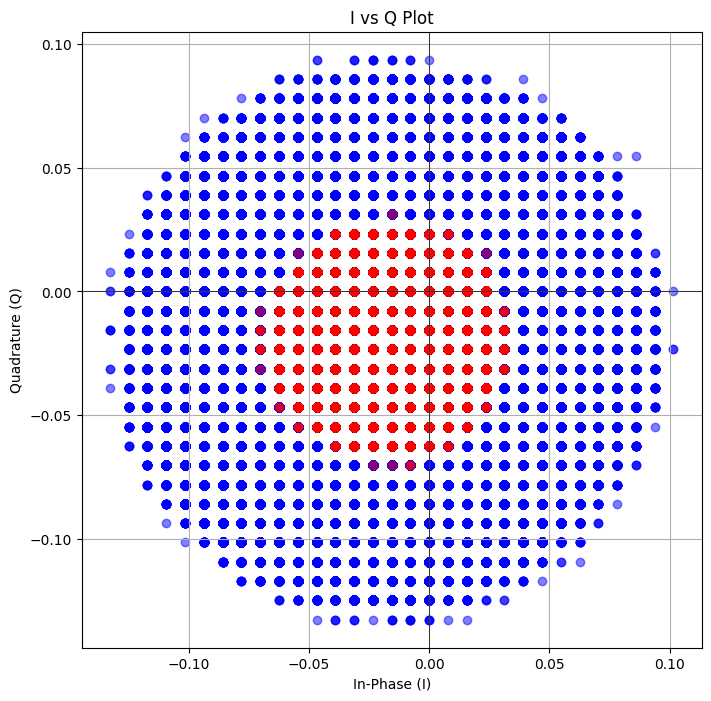

In [7]:
plot_I_vs_Q_2(dataWithOutInterference, dataWithInterferenceLOSCenter)

In [ ]:
plot_I_vs_Q_2(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceLOSCenter)

In [ ]:
plot_I_vs_Q_2(dataWithInterferenceLOSCenter, dataWithInterferenceLOSFirstQuartile)

### Plot FFT

In [ ]:
plot_fft(dataWithInterferenceLOSCenter)

In [ ]:
plot_fft(dataWithInterferenceLOSCenterDC)

### Calculate FFT

In [ ]:
print(calculate_fft(dataWithInterferenceLOSCenter))

In [ ]:
print(calculate_fft(dataWithInterferenceLOSCenterDC))

In [23]:
dataWithInterferenceLOSCenterFFT = calculate_fft(dataWithInterferenceLOSCenterDC)
dataWithInterferenceLOSFirstQuartileFFT = calculate_fft(dataWithInterferenceLOSFirstQuartileDC)
dataWithInterferenceLOSThirdQuartileFFT = calculate_fft(dataWithInterferenceLOSThirdQuartileDC)
dataWithInterferenceNLOSLeftCenterFFT = calculate_fft(dataWithInterferenceNLOSLeftCenterDC)
dataWithInterferenceNLOSLeftFirstQuartileFFT = calculate_fft(dataWithInterferenceNLOSLeftFirstQuartileDC)
dataWithInterferenceNLOSLeftThirdQuartileFFT = calculate_fft(dataWithInterferenceNLOSLeftThirdQuartileDC)
dataWithInterferenceNLOSRightCenterFFT = calculate_fft(dataWithInterferenceNLOSRightCenterDC)
dataWithInterferenceNLOSRightFirstQuartileFFT = calculate_fft(dataWithInterferenceNLOSRightFirstQuartileDC)
dataWithInterferenceNLOSRightThirdQuartileFFT = calculate_fft(dataWithInterferenceNLOSRightThirdQuartileDC)

### Absolute of Complex IQ data Plot

In [ ]:
# combined = I + 1j * Q
plt.plot(np.abs(dataWithOutInterference))
plt.show()

In [ ]:
plt.plot(np.abs(dataWithInterferenceLOSCenter))
plt.show()

### Plotting Power Spectral Density (PSD)

In [ ]:
fig = plt.figure()
plt.psd(dataWithOutInterference, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(4326, 434e6)
plt.show()

In [ ]:
fig = plt.figure()
plt.psd(dataWithInterferenceLOSCenter, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

In [ ]:
fig = plt.figure()
plt.psd(dataWithInterferenceLOSFirstQuartile, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

In [ ]:
fig = plt.figure()
plt.psd(dataWithInterferenceLOSThirdQuartile, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

### Plotting Spectrogram

In [ ]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithOutInterference, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432e6, 434e6)
plt.show()

In [ ]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithInterferenceLOSCenter, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432.75e6, 433.5e6)
plt.show()

In [ ]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithInterferenceLOSFirstQuartile, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432.75e6, 433.5e6)

### Statistical Values for Locations

#### LOS

In [ ]:
#LOS Center
LOS_Center_rssi = calculate_rssi(dataWithInterferenceLOSCenterDC)
LOS_Center_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSCenterDC)
LOS_Center_phase = calculate_IQ_Angle(dataWithInterferenceLOSCenterDC)
LOS_Center_cov = compute_covariance(dataWithInterferenceLOSCenterDC)
LOS_Center_mode = stats.mode(dataWithInterferenceLOSCenterDC)
LOS_Center_skewness = stats.skew(dataWithInterferenceLOSCenterDC)
LOS_Center_kurtosis = stats.kurtosis(dataWithInterferenceLOSCenterDC)
LOS_Center_correlation_coefficient = np.corrcoef(dataWithInterferenceLOSCenterDC, dataWithInterferenceLOSCenterDC)[0, 1]
LOS_Center_z_scores = stats.zscore(dataWithInterferenceLOSCenterDC)

# LOS_Center_q1 = np.percentile(dataWithInterferenceLOSCenterDC, 25)
# LOS_Center_q3 = np.percentile(dataWithInterferenceLOSCenterDC, 75)
# LOS_Center_iqr = LOS_Center_q3 - LOS_Center_q1
# LOS_Center_percentiles = np.percentile(dataWithInterferenceLOSCenterDC, [10, 25, 50, 75, 90])

LOS_Center_correlation_coefficient_withmag = np.corrcoef(LOS_Center_magnitude, LOS_Center_magnitude)

print("LOS Center RSSI:", LOS_Center_rssi)
print("LOS Center Magnitude:", LOS_Center_magnitude)
print("LOS Center Phase:", LOS_Center_phase)
print("LOS Center Amplitude:", LOS_Center_amplitude)
print("LOS Center Covariance:", LOS_Center_cov)
print("LOS Center Mode:", LOS_Center_mode)
print("LOS Center Skewness:", LOS_Center_skewness)
print("LOS Center Kurtosis:", LOS_Center_kurtosis)
print("LOS Center Correlation Coefficient:", LOS_Center_correlation_coefficient)
print("LOS Center Z-scores:", LOS_Center_z_scores)

print("LOS Center Correlation Coefficient:", LOS_Center_correlation_coefficient_withmag)


#Used for the statistical vector

LOS_Center_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSCenterDC)
LOS_Center_mean = np.mean(dataWithInterferenceLOSCenterDC)
LOS_Center_var = np.var(dataWithInterferenceLOSCenterDC)
LOS_Center_median = np.median(dataWithInterferenceLOSCenterDC)
LOS_Center_std_dev = np.std(dataWithInterferenceLOSCenterDC)
LOS_Center_min = np.min(dataWithInterferenceLOSCenterDC)
LOS_Center_max = np.max(dataWithInterferenceLOSCenterDC)
LOS_Center_range = LOS_Center_max - LOS_Center_min
LOS_Center_mad = np.mean(np.abs(dataWithInterferenceLOSCenterDC - LOS_Center_mean))
LOS_Center_coefficient_of_variance = LOS_Center_std_dev / LOS_Center_mean if LOS_Center_mean != 0 else np.nan


LOS_Center_mean_withmag = np.mean(LOS_Center_magnitude)
LOS_Center_var_withmag = np.var(LOS_Center_magnitude)
LOS_Center_median_withmag = np.median(LOS_Center_magnitude)
LOS_Center_std_dev_withmag = np.std(LOS_Center_magnitude)
LOS_Center_min_withmag = np.min(LOS_Center_magnitude)
LOS_Center_max_withmag = np.max(LOS_Center_magnitude)
LOS_Center_range_withmag = LOS_Center_max_withmag - LOS_Center_min_withmag
LOS_Center_mad_withmag = np.mean(np.abs(LOS_Center_magnitude - LOS_Center_mean_withmag))
LOS_Center_coefficient_of_variance_withmag = LOS_Center_std_dev_withmag / LOS_Center_mean_withmag if LOS_Center_mean_withmag != 0 else np.nan


LOS_Center_skewness_withmag = stats.skew(LOS_Center_magnitude)
LOS_Center_kurtosis_withmag = stats.kurtosis(LOS_Center_magnitude)
LOS_Center_q1_withmag = np.percentile(LOS_Center_magnitude, 25)
LOS_Center_q3_withmag = np.percentile(LOS_Center_magnitude, 75)
LOS_Center_iqr_withmag = LOS_Center_q3_withmag - LOS_Center_q1_withmag
LOS_Center_percentiles_withmag = np.percentile(LOS_Center_magnitude, [10, 25, 50, 75, 90])


LOS_Center_mean_FFT = np.mean(dataWithInterferenceLOSCenterFFT)
LOS_Center_var_FFT = np.var(dataWithInterferenceLOSCenterFFT)
LOS_Center_median_FFT = np.median(dataWithInterferenceLOSCenterFFT)
LOS_Center_std_dev_FFT = np.std(dataWithInterferenceLOSCenterFFT)
LOS_Center_min_FFT = np.min(dataWithInterferenceLOSCenterFFT)
LOS_Center_max_FFT = np.max(dataWithInterferenceLOSCenterFFT)
LOS_Center_range_FFT = LOS_Center_max_FFT - LOS_Center_min_FFT
LOS_Center_mad_FFT = np.mean(np.abs(dataWithInterferenceLOSCenterFFT - LOS_Center_mean_FFT))
LOS_Center_coefficient_of_variance_FFT = LOS_Center_std_dev_FFT / LOS_Center_mean_FFT if LOS_Center_mean_FFT != 0 else np.nan
LOS_Center_skewness_FFT = stats.skew(dataWithInterferenceLOSCenterFFT)
LOS_Center_kurtosis_FFT = stats.kurtosis(dataWithInterferenceLOSCenterFFT)
# LOS_Center_q1_FFT = np.percentile(dataWithInterferenceLOSCenterFFT, 25)
# LOS_Center_q3_FFT = np.percentile(dataWithInterferenceLOSCenterFFT, 75)
# LOS_Center_iqr_FFT = LOS_Center_q3_FFT - LOS_Center_q1_FFT
# LOS_Center_percentiles_FFT = np.percentile(dataWithInterferenceLOSCenterFFT, [10, 25, 50, 75, 90])



print("LOS Center Mean:", LOS_Center_mean)
print("LOS Center Variance:", LOS_Center_var)
print("LOS Center Median:", LOS_Center_median)
print("LOS Center Standard Deviation:", LOS_Center_std_dev)
print("LOS Center Min:", LOS_Center_min)
print("LOS Center Max:", LOS_Center_max)
print("LOS Center Range:", LOS_Center_range)
print("LOS Center MAD:", LOS_Center_mad)
print("LOS Center Coefficient of Variance:", LOS_Center_coefficient_of_variance)


print("\n\n")
print("Magnitude\n")
print("LOS Center Mean:", LOS_Center_mean_withmag)
print("LOS Center Variance:", LOS_Center_var_withmag)
print("LOS Center Median:", LOS_Center_median_withmag)
print("LOS Center Standard Deviation:", LOS_Center_std_dev_withmag)
print("LOS Center Min:", LOS_Center_min_withmag)
print("LOS Center Max:", LOS_Center_max_withmag)
print("LOS Center Range:", LOS_Center_range_withmag)
print("LOS Center MAD:", LOS_Center_mad_withmag)
print("LOS Center Coefficient of Variance:", LOS_Center_coefficient_of_variance_withmag)

print("\n\n")
print("LOS Center Q1:", LOS_Center_q1_withmag)
print("LOS Center Q3:", LOS_Center_q3_withmag)
print("LOS Center IQR:", LOS_Center_iqr_withmag)
print("LOS Center Percentiles (10th, 25th, 50th, 75th, 90th):", LOS_Center_percentiles_withmag)
print("LOS Center Skewness:", LOS_Center_skewness_withmag)
print("LOS Center Kurtosis:", LOS_Center_kurtosis_withmag)

print("\n\n")
print("FFT\n")
print("LOS Center Mean:", LOS_Center_mean_FFT)
print("LOS Center Variance:", LOS_Center_var_FFT)
print("LOS Center Median:", LOS_Center_median_FFT)
print("LOS Center Standard Deviation:", LOS_Center_std_dev_FFT)
print("LOS Center Min:", LOS_Center_min_FFT)
print("LOS Center Max:", LOS_Center_max_FFT)
print("LOS Center Range:", LOS_Center_range_FFT)
print("LOS Center MAD:", LOS_Center_mad_FFT)
print("LOS Center Coefficient of Variance:", LOS_Center_coefficient_of_variance_FFT)
# print("LOS Center Q1:", LOS_Center_q1_FFT)
# print("LOS Center Q3:", LOS_Center_q3_FFT)
# print("LOS Center IQR:", LOS_Center_iqr_FFT)
# print("LOS Center Percentiles (10th, 25th, 50th, 75th, 90th):", LOS_Center_percentiles_FFT)
print("LOS Center Skewness:", LOS_Center_skewness_FFT)
print("LOS Center Kurtosis:", LOS_Center_kurtosis_FFT)




In [20]:
LOS_Center_amplitude = np.abs(dataWithInterferenceLOSCenterDC)
LOS_Center_angle = np.angle(dataWithInterferenceLOSCenterDC)

In [ ]:
LOS_Center_vector = np.array([
    LOS_Center_mean,
    LOS_Center_var,
    LOS_Center_median,
    LOS_Center_std_dev,
    LOS_Center_min,
    LOS_Center_max,
    LOS_Center_range,
    LOS_Center_mad,
    LOS_Center_coefficient_of_variance,
    LOS_Center_skewness_withmag,
    LOS_Center_kurtosis_withmag,
    LOS_Center_q1_withmag,
    LOS_Center_q3_withmag,
    LOS_Center_iqr_withmag,
    *LOS_Center_percentiles_withmag  # Unpack percentiles into the vector
])



# Print the vector
print("LOS Center Vector:", LOS_Center_vector)


In [ ]:
LOS_Center_vector_withmag = np.array([
    LOS_Center_mean_withmag,
    LOS_Center_var_withmag,
    LOS_Center_median_withmag,
    LOS_Center_std_dev_withmag,
    LOS_Center_min_withmag,
    LOS_Center_max_withmag,
    LOS_Center_range_withmag,
    LOS_Center_mad_withmag,
    LOS_Center_coefficient_of_variance_withmag,
    LOS_Center_skewness_withmag,
    LOS_Center_kurtosis_withmag,
    LOS_Center_q1_withmag,
    LOS_Center_q3_withmag,
    LOS_Center_iqr_withmag,
    *LOS_Center_percentiles_withmag  # Unpack percentiles into the vector
], dtype=float)
print("LOS Center Vector:", LOS_Center_vector_withmag)

LOS_Center_vector_FFT = np.array([
    LOS_Center_mean_FFT,
    LOS_Center_var_FFT,
    LOS_Center_median_FFT,
    LOS_Center_std_dev_FFT,
    LOS_Center_min_FFT,
    LOS_Center_max_FFT,
    LOS_Center_range_FFT,
    LOS_Center_mad_FFT,
    LOS_Center_coefficient_of_variance_FFT,
], dtype=float)
print("LOS Center Vector FFT:", LOS_Center_vector_FFT)

In [ ]:
#LOS First Quartile
# LOS_first_quartile_rssi = calculate_rssi(dataWithInterferenceLOSFirstQuartileDC)
# LOS_first_quartile_mean = np.mean(dataWithInterferenceLOSFirstQuartileDC)
# LOS_first_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartileDC)
# LOS_first_quartile_var = np.var(dataWithInterferenceLOSFirstQuartileDC)
# LOS_first_quartile_phase = calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartileDC)
# LOS_first_quartile_cov = compute_covariance(dataWithInterferenceLOSFirstQuartileDC)

# print("LOS First Quartile RSSI:", LOS_first_quartile_rssi)
# print("LOS First Quartile Mean:", LOS_first_quartile_mean)
# print("LOS First Quartile Magnitude:", LOS_first_quartile_magnitude)
# print("LOS First Quartile Variance:", LOS_first_quartile_var)
# print("LOS First Quartile Phase:", LOS_first_quartile_phase)
# print("LOS First Quartile Amplitude:", LOS_first_quartile_amplitude)
# print("LOS First Quartile Covariance:", LOS_first_quartile_cov)

LOS_First_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_mean = np.mean(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_var = np.var(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_median = np.median(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_std_dev = np.std(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_min = np.min(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_max = np.max(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_range = LOS_First_Quartile_max - LOS_First_Quartile_min
LOS_First_Quartile_mad = np.mean(np.abs(dataWithInterferenceLOSFirstQuartileDC - LOS_First_Quartile_mean))
LOS_First_Quartile_coefficient_of_variance = (
    LOS_First_Quartile_std_dev / LOS_First_Quartile_mean if LOS_First_Quartile_mean != 0 else np.nan
)

LOS_First_Quartile_mean_withmag = np.mean(LOS_First_Quartile_magnitude)
LOS_First_Quartile_var_withmag = np.var(LOS_First_Quartile_magnitude)
LOS_First_Quartile_median_withmag = np.median(LOS_First_Quartile_magnitude)
LOS_First_Quartile_std_dev_withmag = np.std(LOS_First_Quartile_magnitude)
LOS_First_Quartile_min_withmag = np.min(LOS_First_Quartile_magnitude)
LOS_First_Quartile_max_withmag = np.max(LOS_First_Quartile_magnitude)
LOS_First_Quartile_range_withmag = LOS_First_Quartile_max_withmag - LOS_First_Quartile_min_withmag
LOS_First_Quartile_mad_withmag = np.mean(np.abs(LOS_First_Quartile_magnitude - LOS_First_Quartile_mean_withmag))
LOS_First_Quartile_coefficient_of_variance_withmag = (
    LOS_First_Quartile_std_dev_withmag / LOS_First_Quartile_mean_withmag if LOS_First_Quartile_mean_withmag != 0 else np.nan
)

LOS_First_Quartile_skewness_withmag = stats.skew(LOS_First_Quartile_magnitude)
LOS_First_Quartile_kurtosis_withmag = stats.kurtosis(LOS_First_Quartile_magnitude)
LOS_First_Quartile_q1_withmag = np.percentile(LOS_First_Quartile_magnitude, 25)
LOS_First_Quartile_q3_withmag = np.percentile(LOS_First_Quartile_magnitude, 75)
LOS_First_Quartile_iqr_withmag = LOS_First_Quartile_q3_withmag - LOS_First_Quartile_q1_withmag
LOS_First_Quartile_percentiles_withmag = np.percentile(LOS_First_Quartile_magnitude, [10, 25, 50, 75, 90])

LOS_First_Quartile_mean_FFT = np.mean(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_var_FFT = np.var(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_median_FFT = np.median(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_std_dev_FFT = np.std(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_min_FFT = np.min(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_max_FFT = np.max(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_range_FFT = LOS_First_Quartile_max_FFT - LOS_First_Quartile_min_FFT
LOS_First_Quartile_mad_FFT = np.mean(np.abs(dataWithInterferenceLOSFirstQuartileFFT - LOS_First_Quartile_mean_FFT))
LOS_First_Quartile_coefficient_of_variance_FFT = (
    LOS_First_Quartile_std_dev_FFT / LOS_First_Quartile_mean_FFT if LOS_First_Quartile_mean_FFT != 0 else np.nan
)

LOS_First_Quartile_skewness_FFT = stats.skew(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_kurtosis_FFT = stats.kurtosis(dataWithInterferenceLOSFirstQuartileFFT)

print("LOS First Quartile Mean:", LOS_First_Quartile_mean)
print("LOS First Quartile Variance:", LOS_First_Quartile_var)
print("LOS First Quartile Median:", LOS_First_Quartile_median)
print("LOS First Quartile Standard Deviation:", LOS_First_Quartile_std_dev)
print("LOS First Quartile Min:", LOS_First_Quartile_min)
print("LOS First Quartile Max:", LOS_First_Quartile_max)
print("LOS First Quartile Range:", LOS_First_Quartile_range)
print("LOS First Quartile MAD:", LOS_First_Quartile_mad)
print("LOS First Quartile Coefficient of Variance:", LOS_First_Quartile_coefficient_of_variance)

print("\n\n")
print("Magnitude")
print("LOS First Quartile Mean:", LOS_First_Quartile_mean_withmag)
print("LOS First Quartile Variance:", LOS_First_Quartile_var_withmag)
print("LOS First Quartile Median:", LOS_First_Quartile_median_withmag)
print("LOS First Quartile Standard Deviation:", LOS_First_Quartile_std_dev_withmag)
print("LOS First Quartile Min:", LOS_First_Quartile_min_withmag)
print("LOS First Quartile Max:", LOS_First_Quartile_max_withmag)
print("LOS First Quartile Range:", LOS_First_Quartile_range_withmag)
print("LOS First Quartile MAD:", LOS_First_Quartile_mad_withmag)
print("LOS First Quartile Coefficient of Variance:", LOS_First_Quartile_coefficient_of_variance_withmag)

print("\n")
print("LOS First Quartile Q1:", LOS_First_Quartile_q1_withmag)
print("LOS First Quartile Q3:", LOS_First_Quartile_q3_withmag)
print("LOS First Quartile IQR:", LOS_First_Quartile_iqr_withmag)
print("LOS First Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", LOS_First_Quartile_percentiles_withmag)
print("LOS First Quartile Skewness:", LOS_First_Quartile_skewness_withmag)
print("LOS First Quartile Kurtosis:", LOS_First_Quartile_kurtosis_withmag)

print("\n\n")
print("FFT")
print("LOS First Quartile Mean:", LOS_First_Quartile_mean_FFT)
print("LOS First Quartile Variance:", LOS_First_Quartile_var_FFT)
print("LOS First Quartile Median:", LOS_First_Quartile_median_withmag)
print("LOS First Quartile Standard Deviation:", LOS_First_Quartile_std_dev_FFT)
print("LOS First Quartile Min:", LOS_First_Quartile_min_FFT)
print("LOS First Quartile Max:", LOS_First_Quartile_max_FFT)
print("LOS First Quartile Range:", LOS_First_Quartile_range_FFT)
print("LOS First Quartile MAD:", LOS_First_Quartile_mad_FFT)
print("LOS First Quartile Coefficient of Variance:", LOS_First_Quartile_coefficient_of_variance_FFT)



In [22]:
LOS_first_quartile_amplitude = np.abs(dataWithInterferenceLOSFirstQuartileDC)
LOS_first_quartile_angle = np.angle(dataWithInterferenceLOSFirstQuartileDC)

In [ ]:
LOS_First_Quartile_vector = np.array([
    LOS_First_Quartile_mean,
    LOS_First_Quartile_var,
    LOS_First_Quartile_median,
    LOS_First_Quartile_std_dev,
    LOS_First_Quartile_min,
    LOS_First_Quartile_max,
    LOS_First_Quartile_range,
    LOS_First_Quartile_mad,
    LOS_First_Quartile_coefficient_of_variance,
    LOS_First_Quartile_skewness_withmag,
    LOS_First_Quartile_kurtosis_withmag,
    LOS_First_Quartile_q1_withmag,
    LOS_First_Quartile_q3_withmag,
    LOS_First_Quartile_iqr_withmag,
    *LOS_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])



# Print the vector
print("LOS First Quartile Vector:", LOS_First_Quartile_vector)



In [ ]:
LOS_First_Quartile_vector_withmag = np.array([
    LOS_First_Quartile_mean_withmag,
    LOS_First_Quartile_var_withmag,
    LOS_First_Quartile_median_withmag,
    LOS_First_Quartile_std_dev_withmag,
    LOS_First_Quartile_min_withmag,
    LOS_First_Quartile_max_withmag,
    LOS_First_Quartile_range_withmag,
    LOS_First_Quartile_mad_withmag,
    LOS_First_Quartile_coefficient_of_variance_withmag,
    LOS_First_Quartile_skewness_withmag,
    LOS_First_Quartile_kurtosis_withmag,
    LOS_First_Quartile_q1_withmag,
    LOS_First_Quartile_q3_withmag,
    LOS_First_Quartile_iqr_withmag,
    *LOS_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
], dtype=float)

print("\n\n")
print("LOS First Quartile Vector:", LOS_First_Quartile_vector_withmag)

LOS_First_Quartile_vector_FFT = np.array([
    LOS_First_Quartile_mean_FFT,
    LOS_First_Quartile_var_FFT,
    LOS_First_Quartile_median_FFT,
    LOS_First_Quartile_std_dev_FFT,
    LOS_First_Quartile_min_FFT,
    LOS_First_Quartile_max_FFT,
    LOS_First_Quartile_range_FFT,
    LOS_First_Quartile_mad_FFT,
    LOS_First_Quartile_coefficient_of_variance_FFT,
], dtype=float)

print("\n\n")
print("LOS First Quartile Vector:", LOS_First_Quartile_vector_FFT)

In [ ]:
#LOS Third Quartile
# LOS_third_quartile_rssi = calculate_rssi(dataWithInterferenceLOSThirdQuartileDC)
# LOS_third_quartile_mean = np.mean(dataWithInterferenceLOSThirdQuartileDC)
# LOS_third_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartileDC)
# LOS_third_quartile_var = np.var(dataWithInterferenceLOSThirdQuartileDC)
# LOS_third_quartile_phase = calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartileDC)
# LOS_third_quartile_cov = compute_covariance(dataWithInterferenceLOSThirdQuartileDC)

# print("LOS Third Quartile RSSI:", LOS_third_quartile_rssi)
# print("LOS Third Quartile Mean:", LOS_third_quartile_mean)
# print("LOS Third Quartile Magnitude:", LOS_third_quartile_magnitude)
# print("LOS Third Quartile Variance:", LOS_third_quartile_var)
# print("LOS Third Quartile Phase:", LOS_third_quartile_phase)
# print("LOS Third Quartile Amplitude:", LOS_third_quartile_amplitude)
# print("LOS Third Quartile Covariance:", LOS_third_quartile_cov)

LOS_Third_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_mean = np.mean(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_var = np.var(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_median = np.median(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_std_dev = np.std(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_min = np.min(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_max = np.max(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_range = LOS_Third_Quartile_max - LOS_Third_Quartile_min
LOS_Third_Quartile_mad = np.mean(np.abs(dataWithInterferenceLOSThirdQuartileDC - LOS_Third_Quartile_mean))
LOS_Third_Quartile_coefficient_of_variance = LOS_Third_Quartile_std_dev / LOS_Third_Quartile_mean if LOS_Third_Quartile_mean != 0 else np.nan

LOS_Third_Quartile_mean_withmag = np.mean(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_var_withmag = np.var(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_median_withmag = np.median(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_std_dev_withmag = np.std(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_min_withmag = np.min(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_max_withmag = np.max(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_range_withmag = LOS_Third_Quartile_max_withmag - LOS_Third_Quartile_min_withmag
LOS_Third_Quartile_mad_withmag = np.mean(np.abs(LOS_Third_Quartile_magnitude - LOS_Third_Quartile_mean_withmag))
LOS_Third_Quartile_coefficient_of_variance_withmag = LOS_Third_Quartile_std_dev_withmag / LOS_Third_Quartile_mean_withmag if LOS_Third_Quartile_mean_withmag != 0 else np.nan

LOS_Third_Quartile_skewness_withmag = stats.skew(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_kurtosis_withmag = stats.kurtosis(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_q1_withmag = np.percentile(LOS_Third_Quartile_magnitude, 25)
LOS_Third_Quartile_q3_withmag = np.percentile(LOS_Third_Quartile_magnitude, 75)
LOS_Third_Quartile_iqr_withmag = LOS_Third_Quartile_q3_withmag - LOS_Third_Quartile_q1_withmag
LOS_Third_Quartile_percentiles_withmag = np.percentile(LOS_Third_Quartile_magnitude, [10, 25, 50, 75, 90])

LOS_Third_Quartile_mean_FFT = np.mean(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_var_FFT = np.var(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_median_FFT = np.median(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_std_dev_FFT = np.std(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_min_FFT = np.min(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_max_FFT = np.max(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_range_FFT = LOS_Third_Quartile_max_FFT - LOS_Third_Quartile_min_FFT
LOS_Third_Quartile_mad_FFT = np.mean(np.abs(dataWithInterferenceLOSThirdQuartileFFT - LOS_Third_Quartile_mean_FFT))
LOS_Third_Quartile_coefficient_of_variance_FFT = (
    LOS_Third_Quartile_std_dev_FFT / LOS_Third_Quartile_mean_FFT 
    if LOS_Third_Quartile_mean_FFT != 0 else np.nan
)

print("LOS Third Quartile Mean:", LOS_Third_Quartile_mean)
print("LOS Third Quartile Variance:", LOS_Third_Quartile_var)
print("LOS Third Quartile Median:", LOS_Third_Quartile_median)
print("LOS Third Quartile Standard Deviation:", LOS_Third_Quartile_std_dev)
print("LOS Third Quartile Min:", LOS_Third_Quartile_min)
print("LOS Third Quartile Max:", LOS_Third_Quartile_max)
print("LOS Third Quartile Range:", LOS_Third_Quartile_range)
print("LOS Third Quartile MAD:", LOS_Third_Quartile_mad)
print("LOS Third Quartile Coefficient of Variance:", LOS_Third_Quartile_coefficient_of_variance)

print("\n\n")
print("Magnitude")
print("LOS Third Quartile Mean:", LOS_Third_Quartile_mean_withmag)
print("LOS Third Quartile Variance:", LOS_Third_Quartile_var_withmag)
print("LOS Third Quartile Median:", LOS_Third_Quartile_median_withmag)
print("LOS Third Quartile Standard Deviation:", LOS_Third_Quartile_std_dev_withmag)
print("LOS Third Quartile Min:", LOS_Third_Quartile_min_withmag)
print("LOS Third Quartile Max:", LOS_Third_Quartile_max_withmag)
print("LOS Third Quartile Range:", LOS_Third_Quartile_range_withmag)
print("LOS Third Quartile MAD:", LOS_Third_Quartile_mad)
print("LOS Third Quartile Coefficient of Variance:", LOS_Third_Quartile_coefficient_of_variance_withmag)

print("\n")
print("LOS Third Quartile Q1:", LOS_Third_Quartile_q1_withmag)
print("LOS Third Quartile Q3:", LOS_Third_Quartile_q3_withmag)
print("LOS Third Quartile IQR:", LOS_Third_Quartile_iqr_withmag)
print("LOS Third Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", LOS_Third_Quartile_percentiles_withmag)
print("LOS Third Quartile Skewness:", LOS_Third_Quartile_skewness_withmag)
print("LOS Third Quartile Kurtosis:", LOS_Third_Quartile_kurtosis_withmag)

print("\n\n")
print("FFT")
print("LOS Third Quartile Mean:", LOS_Third_Quartile_mean_FFT)
print("LOS Third Quartile Variance:", LOS_Third_Quartile_var_FFT)
print("LOS Third Quartile Median:", LOS_Third_Quartile_median_FFT)
print("LOS Third Quartile Standard Deviation:", LOS_Third_Quartile_std_dev_FFT)
print("LOS Third Quartile Min:", LOS_Third_Quartile_min_FFT)
print("LOS Third Quartile Max:", LOS_Third_Quartile_max_FFT)
print("LOS Third Quartile Range:", LOS_Third_Quartile_range_FFT)
print("LOS Third Quartile MAD:", LOS_Third_Quartile_mad_FFT)
print("LOS Third Quartile Coefficient of Variance:", LOS_Third_Quartile_coefficient_of_variance_FFT)



In [21]:
LOS_third_quartile_amplitude = np.abs(dataWithInterferenceLOSThirdQuartileDC)
LOS_third_quartile_angle = np.angle(dataWithInterferenceLOSThirdQuartileDC)

In [ ]:
LOS_Third_Quartile_vector = np.array([
    LOS_Third_Quartile_mean,
    LOS_Third_Quartile_var,
    LOS_Third_Quartile_median,
    LOS_Third_Quartile_std_dev,
    LOS_Third_Quartile_min,
    LOS_Third_Quartile_max,
    LOS_Third_Quartile_range,
    LOS_Third_Quartile_mad,
    LOS_Third_Quartile_coefficient_of_variance,
    LOS_Third_Quartile_skewness_withmag,
    LOS_Third_Quartile_kurtosis_withmag,
    LOS_Third_Quartile_q1_withmag,
    LOS_Third_Quartile_q3_withmag,
    LOS_Third_Quartile_iqr_withmag,
    *LOS_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

LOS_Third_Quartile_vector_withmag = np.array([
    LOS_Third_Quartile_mean_withmag,
    LOS_Third_Quartile_var_withmag,
    LOS_Third_Quartile_median_withmag,
    LOS_Third_Quartile_std_dev_withmag,
    LOS_Third_Quartile_min_withmag,
    LOS_Third_Quartile_max_withmag,
    LOS_Third_Quartile_range_withmag,
    LOS_Third_Quartile_mad_withmag,
    LOS_Third_Quartile_coefficient_of_variance_withmag,
    LOS_Third_Quartile_skewness_withmag,
    LOS_Third_Quartile_kurtosis_withmag,
    LOS_Third_Quartile_q1_withmag,
    LOS_Third_Quartile_q3_withmag,
    LOS_Third_Quartile_iqr_withmag,
    *LOS_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
], dtype=float)

# Print the vector
print("LOS Third Quartile Vector:", LOS_Third_Quartile_vector)
print("\n")
print("LOS Third Quartile Vector:", LOS_Third_Quartile_vector_withmag)

LOS_Third_Quartile_vector_FFT = np.array([
    LOS_Third_Quartile_mean_FFT,
    LOS_Third_Quartile_var_FFT,
    LOS_Third_Quartile_median_FFT,
    LOS_Third_Quartile_std_dev_FFT,
    LOS_Third_Quartile_min_FFT,
    LOS_Third_Quartile_max_FFT,
    LOS_Third_Quartile_coefficient_of_variance_FFT,
    LOS_Third_Quartile_range_FFT,
    LOS_Third_Quartile_mad_FFT,
], dtype=float)

# Print the vector
print("\nLOS Third Quartile Vector FFT:", LOS_Third_Quartile_vector_FFT)


#### NLOS Left

In [ ]:
# NLOS Left Center
# NLOS_left_center_rssi = calculate_rssi(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_mean = np.mean(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_var = np.var(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_phase = calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_amplitude = np.abs(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_cov = compute_covariance(dataWithInterferenceNLOSLeftCenterDC)

# print("NLOS Left Center RSSI:", NLOS_left_center_rssi)
# print("NLOS Left Center Mean:", NLOS_left_center_mean)
# print("NLOS Left Center Magnitude:", NLOS_left_center_magnitude)
# print("NLOS Left Center Variance:", NLOS_left_center_var)
# print("NLOS Left Center Phase:", NLOS_left_center_phase)
# print("NLOS Left Center Amplitude:", NLOS_left_center_amplitude)
# print("NLOS Left Center Covariance:", NLOS_left_center_cov)

NLOS_Left_Center_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_mean = np.mean(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_var = np.var(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_median = np.median(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_std_dev = np.std(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_min = np.min(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_max = np.max(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_range = NLOS_Left_Center_max - NLOS_Left_Center_min
NLOS_Left_Center_mad = np.mean(np.abs(dataWithInterferenceNLOSLeftCenterDC - NLOS_Left_Center_mean))
NLOS_Left_Center_coefficient_of_variance = NLOS_Left_Center_std_dev / NLOS_Left_Center_mean if NLOS_Left_Center_mean != 0 else np.nan

NLOS_Left_Center_skewness_withmag = stats.skew(NLOS_Left_Center_magnitude)
NLOS_Left_Center_kurtosis_withmag = stats.kurtosis(NLOS_Left_Center_magnitude)
NLOS_Left_Center_q1_withmag = np.percentile(NLOS_Left_Center_magnitude, 25)
NLOS_Left_Center_q3_withmag = np.percentile(NLOS_Left_Center_magnitude, 75)
NLOS_Left_Center_iqr_withmag = NLOS_Left_Center_q3_withmag - NLOS_Left_Center_q1_withmag
NLOS_Left_Center_percentiles_withmag = np.percentile(NLOS_Left_Center_magnitude, [10, 25, 50, 75, 90])

NLOS_Left_Center_mean_withmag = np.mean(NLOS_Left_Center_magnitude)
NLOS_Left_Center_var_withmag = np.var(NLOS_Left_Center_magnitude)
NLOS_Left_Center_median_withmag = np.median(NLOS_Left_Center_magnitude)
NLOS_Left_Center_std_dev_withmag = np.std(NLOS_Left_Center_magnitude)
NLOS_Left_Center_min_withmag = np.min(NLOS_Left_Center_magnitude)
NLOS_Left_Center_max_withmag = np.max(NLOS_Left_Center_magnitude)
NLOS_Left_Center_range_withmag = NLOS_Left_Center_max_withmag - NLOS_Left_Center_min_withmag
NLOS_Left_Center_mad_withmag = np.mean(np.abs(NLOS_Left_Center_magnitude - NLOS_Left_Center_mean_withmag))
NLOS_Left_Center_coefficient_of_variance_withmag = NLOS_Left_Center_std_dev_withmag / NLOS_Left_Center_mean_withmag if NLOS_Left_Center_mean_withmag != 0 else np.nan

NLOS_Left_Center_magnitude_FFT = calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_mean_FFT = np.mean(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_var_FFT = np.var(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_median_FFT = np.median(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_std_dev_FFT = np.std(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_min_FFT = np.min(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_max_FFT = np.max(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_range_FFT = NLOS_Left_Center_max_FFT - NLOS_Left_Center_min_FFT
NLOS_Left_Center_mad_FFT = np.mean(np.abs(dataWithInterferenceNLOSLeftCenterFFT - NLOS_Left_Center_mean_FFT))
NLOS_Left_Center_coefficient_of_variance_FFT = NLOS_Left_Center_std_dev_FFT / NLOS_Left_Center_mean_FFT if NLOS_Left_Center_mean_FFT != 0 else np.nan

print("NLOS Left Center Mean:", NLOS_Left_Center_mean)
print("NLOS Left Center Variance:", NLOS_Left_Center_var)
print("NLOS Left Center Median:", NLOS_Left_Center_median)
print("NLOS Left Center Standard Deviation:", NLOS_Left_Center_std_dev)
print("NLOS Left Center Min:", NLOS_Left_Center_min)
print("NLOS Left Center Max:", NLOS_Left_Center_max)
print("NLOS Left Center Range:", NLOS_Left_Center_range)
print("NLOS Left Center MAD:", NLOS_Left_Center_mad)
print("NLOS Left Center Coefficient of Variance:", NLOS_Left_Center_coefficient_of_variance)

print("NLOS Left Center Q1:", NLOS_Left_Center_q1_withmag)
print("NLOS Left Center Q3:", NLOS_Left_Center_q3_withmag)
print("NLOS Left Center IQR:", NLOS_Left_Center_iqr_withmag)
print("NLOS Left Center Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Left_Center_percentiles_withmag)
print("NLOS Left Center Skewness:", NLOS_Left_Center_skewness_withmag)
print("NLOS Left Center Kurtosis:", NLOS_Left_Center_kurtosis_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Left Center Mean with magnitude:", NLOS_Left_Center_mean_withmag)
print("NLOS Left Center Variance:", NLOS_Left_Center_var_withmag)
print("NLOS Left Center Median:", NLOS_Left_Center_median_withmag)
print("NLOS Left Center Standard Deviation:", NLOS_Left_Center_std_dev_withmag)
print("NLOS Left Center Min:", NLOS_Left_Center_min_withmag)
print("NLOS Left Center Max:", NLOS_Left_Center_max_withmag)
print("NLOS Left Center Range:", NLOS_Left_Center_range_withmag)
print("NLOS Left Center MAD:", NLOS_Left_Center_mad_withmag)
print("NLOS Left Center Coefficient of Variance:", NLOS_Left_Center_coefficient_of_variance_withmag)

print("\n\n")
print("FFT")
print("NLOS Left Center Mean with magnitude:", NLOS_Left_Center_mean_FFT)
print("NLOS Left Center Variance:", NLOS_Left_Center_var_FFT)
print("NLOS Left Center Median:", NLOS_Left_Center_median_FFT)
print("NLOS Left Center Standard Deviation:", NLOS_Left_Center_std_dev_FFT)
print("NLOS Left Center Min:", NLOS_Left_Center_min_FFT)
print("NLOS Left Center Max:", NLOS_Left_Center_max_FFT)
print("NLOS Left Center Range:", NLOS_Left_Center_range_FFT)
print("NLOS Left Center MAD:", NLOS_Left_Center_mad_FFT)
print("NLOS Left Center Coefficient of Variance:", NLOS_Left_Center_coefficient_of_variance_FFT)



In [ ]:
NLOS_Left_Center_vector = np.array([
    NLOS_Left_Center_mean,
    NLOS_Left_Center_var,
    NLOS_Left_Center_median,
    NLOS_Left_Center_std_dev,
    NLOS_Left_Center_min,
    NLOS_Left_Center_max,
    NLOS_Left_Center_range,
    NLOS_Left_Center_mad,
    NLOS_Left_Center_coefficient_of_variance,
    NLOS_Left_Center_skewness_withmag,
    NLOS_Left_Center_kurtosis_withmag,
    NLOS_Left_Center_q1_withmag,
    NLOS_Left_Center_q3_withmag,
    NLOS_Left_Center_iqr_withmag,
    *NLOS_Left_Center_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left Center Vector:", NLOS_Left_Center_vector)

NLOS_Left_Center_vector_withmag = np.array([
    NLOS_Left_Center_mean_withmag,
    NLOS_Left_Center_var_withmag,
    NLOS_Left_Center_median_withmag,
    NLOS_Left_Center_std_dev_withmag,
    NLOS_Left_Center_min_withmag,
    NLOS_Left_Center_max_withmag,
    NLOS_Left_Center_range_withmag,
    NLOS_Left_Center_mad_withmag,
    NLOS_Left_Center_coefficient_of_variance_withmag,
    NLOS_Left_Center_skewness_withmag,
    NLOS_Left_Center_kurtosis_withmag,
    NLOS_Left_Center_q1_withmag,
    NLOS_Left_Center_q3_withmag,
    NLOS_Left_Center_iqr_withmag,
    *NLOS_Left_Center_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left Center Vector with Magnitude:", NLOS_Left_Center_vector_withmag)

NLOS_Left_Center_vector_FFT = np.array([
    NLOS_Left_Center_mean_FFT,
    NLOS_Left_Center_var_FFT,
    NLOS_Left_Center_median_FFT,
    NLOS_Left_Center_std_dev_FFT,
    NLOS_Left_Center_min_FFT,
    NLOS_Left_Center_max_FFT,
    NLOS_Left_Center_range_FFT,
    NLOS_Left_Center_mad_FFT,
    NLOS_Left_Center_coefficient_of_variance_FFT,
])
print("NLOS Left Center Vector with FFT:", NLOS_Left_Center_vector_FFT)

In [ ]:
# NLOS Left First Quartile
# NLOS_left_first_quartile_rssi = calculate_rssi(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_mean = np.mean(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_var = np.var(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_phase = calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_amplitude = np.abs(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_cov = compute_covariance(dataWithInterferenceNLOSLeftFirstQuartileDC)

# print("NLOS Left First Quartile RSSI:", NLOS_left_first_quartile_rssi)
# print("NLOS Left First Quartile Mean:", NLOS_left_first_quartile_mean)
# print("NLOS Left First Quartile Magnitude:", NLOS_left_first_quartile_magnitude)
# print("NLOS Left First Quartile Variance:", NLOS_left_first_quartile_var)
# print("NLOS Left First Quartile Phase:", NLOS_left_first_quartile_phase)
# print("NLOS Left First Quartile Amplitude:", NLOS_left_first_quartile_amplitude)
# print("NLOS Left First Quartile Covariance:", NLOS_left_first_quartile_cov)

NLOS_Left_First_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_mean = np.mean(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_var = np.var(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_median = np.median(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_std_dev = np.std(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_min = np.min(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_max = np.max(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_range = NLOS_Left_First_Quartile_max - NLOS_Left_First_Quartile_min
NLOS_Left_First_Quartile_mad = np.mean(np.abs(dataWithInterferenceNLOSLeftFirstQuartileDC - NLOS_Left_First_Quartile_mean))
NLOS_Left_First_Quartile_coefficient_of_variance = NLOS_Left_First_Quartile_std_dev / NLOS_Left_First_Quartile_mean if NLOS_Left_First_Quartile_mean != 0 else np.nan

NLOS_Left_First_Quartile_skewness_withmag = stats.skew(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_kurtosis_withmag = stats.kurtosis(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_q1_withmag = np.percentile(NLOS_Left_First_Quartile_magnitude, 25)
NLOS_Left_First_Quartile_q3_withmag = np.percentile(NLOS_Left_First_Quartile_magnitude, 75)
NLOS_Left_First_Quartile_iqr_withmag = NLOS_Left_First_Quartile_q3_withmag - NLOS_Left_First_Quartile_q1_withmag
NLOS_Left_First_Quartile_percentiles_withmag = np.percentile(NLOS_Left_First_Quartile_magnitude, [10, 25, 50, 75, 90])

NLOS_Left_First_Quartile_mean_withmag = np.mean(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_var_withmag = np.var(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_median_withmag = np.median(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_std_dev_withmag = np.std(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_min_withmag = np.min(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_max_withmag = np.max(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_range_withmag = NLOS_Left_First_Quartile_max_withmag - NLOS_Left_First_Quartile_min_withmag
NLOS_Left_First_Quartile_mad_withmag = np.mean(np.abs(NLOS_Left_First_Quartile_magnitude - NLOS_Left_First_Quartile_mean_withmag))
NLOS_Left_First_Quartile_coefficient_of_variance_withmag = NLOS_Left_First_Quartile_std_dev_withmag / NLOS_Left_First_Quartile_mean_withmag if NLOS_Left_First_Quartile_mean_withmag != 0 else np.nan

NLOS_Left_First_Quartile_mean_FFT = np.mean(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_var_FFT = np.var(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_median_FFT = np.median(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_std_dev_FFT = np.std(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_min_FFT = np.min(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_max_FFT = np.max(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_range_FFT = NLOS_Left_First_Quartile_max_FFT - NLOS_Left_First_Quartile_min_FFT
NLOS_Left_First_Quartile_mad_FFT = np.mean(np.abs(dataWithInterferenceNLOSLeftFirstQuartileFFT - NLOS_Left_First_Quartile_mean_FFT))
NLOS_Left_First_Quartile_coefficient_of_variance_FFT = (
    NLOS_Left_First_Quartile_std_dev_FFT / NLOS_Left_First_Quartile_mean_FFT 
    if NLOS_Left_First_Quartile_mean_FFT != 0 else np.nan
)


print("NLOS Left First Quartile Mean:", NLOS_Left_First_Quartile_mean)
print("NLOS Left First Quartile Variance:", NLOS_Left_First_Quartile_var)
print("NLOS Left First Quartile Median:", NLOS_Left_First_Quartile_median)
print("NLOS Left First Quartile Standard Deviation:", NLOS_Left_First_Quartile_std_dev)
print("NLOS Left First Quartile Min:", NLOS_Left_First_Quartile_min)
print("NLOS Left First Quartile Max:", NLOS_Left_First_Quartile_max)
print("NLOS Left First Quartile Range:", NLOS_Left_First_Quartile_range)
print("NLOS Left First Quartile MAD:", NLOS_Left_First_Quartile_mad)
print("NLOS Left First Quartile Coefficient of Variance:", NLOS_Left_First_Quartile_coefficient_of_variance)

print("NLOS Left First Quartile Q1:", NLOS_Left_First_Quartile_q1_withmag)
print("NLOS Left First Quartile Q3:", NLOS_Left_First_Quartile_q3_withmag)
print("NLOS Left First Quartile IQR:", NLOS_Left_First_Quartile_iqr_withmag)
print("NLOS Left First Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Left_First_Quartile_percentiles_withmag)
print("NLOS Left First Quartile Skewness:", NLOS_Left_First_Quartile_skewness_withmag)
print("NLOS Left First Quartile Kurtosis:", NLOS_Left_First_Quartile_kurtosis_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Left First Quartile Mean:", NLOS_Left_First_Quartile_mean_withmag)
print("NLOS Left First Quartile Variance:", NLOS_Left_First_Quartile_var_withmag)
print("NLOS Left First Quartile Median:", NLOS_Left_First_Quartile_median_withmag)
print("NLOS Left First Quartile Standard Deviation:", NLOS_Left_First_Quartile_std_dev_withmag)
print("NLOS Left First Quartile Min:", NLOS_Left_First_Quartile_min_withmag)
print("NLOS Left First Quartile Max:", NLOS_Left_First_Quartile_max_withmag)
print("NLOS Left First Quartile Range:", NLOS_Left_First_Quartile_range_withmag)
print("NLOS Left First Quartile MAD:", NLOS_Left_First_Quartile_mad_withmag)
print("NLOS Left First Quartile Coefficient of Variance:", NLOS_Left_First_Quartile_coefficient_of_variance_withmag)

print("\n\n")
print("FFT")
print("NLOS Left First Quartile Mean:", NLOS_Left_First_Quartile_mean_FFT)
print("NLOS Left First Quartile Variance:", NLOS_Left_First_Quartile_var_FFT)
print("NLOS Left First Quartile Median:", NLOS_Left_First_Quartile_median_FFT)
print("NLOS Left First Quartile Standard Deviation:", NLOS_Left_First_Quartile_std_dev_FFT)
print("NLOS Left First Quartile Min:", NLOS_Left_First_Quartile_min_FFT)
print("NLOS Left First Quartile Max:", NLOS_Left_First_Quartile_max_FFT)
print("NLOS Left First Quartile Range:", NLOS_Left_First_Quartile_range_FFT)
print("NLOS Left First Quartile MAD:", NLOS_Left_First_Quartile_mad_FFT)
print("NLOS Left First Quartile Coefficient of Variance:", NLOS_Left_First_Quartile_coefficient_of_variance_FFT)



In [ ]:
NLOS_Left_First_Quartile_vector = np.array([
    NLOS_Left_First_Quartile_mean,
    NLOS_Left_First_Quartile_var,
    NLOS_Left_First_Quartile_median,
    NLOS_Left_First_Quartile_std_dev,
    NLOS_Left_First_Quartile_min,
    NLOS_Left_First_Quartile_max,
    NLOS_Left_First_Quartile_range,
    NLOS_Left_First_Quartile_mad,
    NLOS_Left_First_Quartile_coefficient_of_variance,
    NLOS_Left_First_Quartile_skewness_withmag,
    NLOS_Left_First_Quartile_kurtosis_withmag,
    NLOS_Left_First_Quartile_q1_withmag,
    NLOS_Left_First_Quartile_q3_withmag,
    NLOS_Left_First_Quartile_iqr_withmag,
    *NLOS_Left_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left First Quartile Vector:", NLOS_Left_First_Quartile_vector)

NLOS_Left_First_Quartile_vector_withmag = np.array([
    NLOS_Left_First_Quartile_mean_withmag,
    NLOS_Left_First_Quartile_var_withmag,
    NLOS_Left_First_Quartile_median_withmag,
    NLOS_Left_First_Quartile_std_dev_withmag,
    NLOS_Left_First_Quartile_min_withmag,
    NLOS_Left_First_Quartile_max_withmag,
    NLOS_Left_First_Quartile_range_withmag,
    NLOS_Left_First_Quartile_mad_withmag,
    NLOS_Left_First_Quartile_coefficient_of_variance_withmag,
    NLOS_Left_First_Quartile_skewness_withmag,
    NLOS_Left_First_Quartile_kurtosis_withmag,
    NLOS_Left_First_Quartile_q1_withmag,
    NLOS_Left_First_Quartile_q3_withmag,
    NLOS_Left_First_Quartile_iqr_withmag,
    *NLOS_Left_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left First Quartile Vector with Magnitude:", NLOS_Left_First_Quartile_vector_withmag)

NLOS_Left_First_Quartile_vector_FFT = np.array([
    NLOS_Left_First_Quartile_mean_FFT,
    NLOS_Left_First_Quartile_var_FFT,
    NLOS_Left_First_Quartile_median_FFT,
    NLOS_Left_First_Quartile_std_dev_FFT,
    NLOS_Left_First_Quartile_min_FFT,
    NLOS_Left_First_Quartile_max_FFT,
    NLOS_Left_First_Quartile_range_FFT,
    NLOS_Left_First_Quartile_mad_FFT,
    NLOS_Left_First_Quartile_coefficient_of_variance_FFT,
])

print("NLOS Left First Quartile Vector with FFT:", NLOS_Left_First_Quartile_vector_FFT)


In [ ]:
# NLOS Left Third Quartile
# NLOS_left_third_quartile_rssi = calculate_rssi(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_mean = np.mean(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_var = np.var(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_phase = calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_amplitude = np.abs(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_cov = compute_covariance(dataWithInterferenceNLOSLeftThirdQuartileDC)

# print("NLOS Left Third Quartile RSSI:", NLOS_left_third_quartile_rssi)
# print("NLOS Left Third Quartile Mean:", NLOS_left_third_quartile_mean)
# print("NLOS Left Third Quartile Magnitude:", NLOS_left_third_quartile_magnitude)
# print("NLOS Left Third Quartile Variance:", NLOS_left_third_quartile_var)
# print("NLOS Left Third Quartile Phase:", NLOS_left_third_quartile_phase)
# print("NLOS Left Third Quartile Amplitude:", NLOS_left_third_quartile_amplitude)
# print("NLOS Left Third Quartile Covariance:", NLOS_left_third_quartile_cov)

NLOS_Left_Third_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_mean = np.mean(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_var = np.var(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_median = np.median(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_std_dev = np.std(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_min = np.min(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_max = np.max(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_range = NLOS_Left_Third_Quartile_max - NLOS_Left_Third_Quartile_min
NLOS_Left_Third_Quartile_mad = np.mean(np.abs(dataWithInterferenceNLOSLeftThirdQuartileDC - NLOS_Left_Third_Quartile_mean))
NLOS_Left_Third_Quartile_coefficient_of_variance = NLOS_Left_Third_Quartile_std_dev / NLOS_Left_Third_Quartile_mean if NLOS_Left_Third_Quartile_mean != 0 else np.nan

NLOS_Left_Third_Quartile_skewness_withmag = stats.skew(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_kurtosis_withmag = stats.kurtosis(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_q1_withmag = np.percentile(NLOS_Left_Third_Quartile_magnitude, 25)
NLOS_Left_Third_Quartile_q3_withmag = np.percentile(NLOS_Left_Third_Quartile_magnitude, 75)
NLOS_Left_Third_Quartile_iqr_withmag = NLOS_Left_Third_Quartile_q3_withmag - NLOS_Left_Third_Quartile_q1_withmag
NLOS_Left_Third_Quartile_percentiles_withmag = np.percentile(NLOS_Left_Third_Quartile_magnitude, [10, 25, 50, 75, 90])

NLOS_Left_Third_Quartile_mean_withmag = np.mean(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_var_withmag = np.var(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_median_withmag = np.median(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_std_dev_withmag = np.std(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_min_withmag = np.min(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_max_withmag = np.max(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_range_withmag = NLOS_Left_Third_Quartile_max_withmag - NLOS_Left_Third_Quartile_min_withmag
NLOS_Left_Third_Quartile_mad_withmag = np.mean(np.abs(NLOS_Left_Third_Quartile_magnitude - NLOS_Left_Third_Quartile_mean_withmag))
NLOS_Left_Third_Quartile_coefficient_of_variance_withmag = NLOS_Left_Third_Quartile_std_dev_withmag / NLOS_Left_Third_Quartile_mean_withmag if NLOS_Left_Third_Quartile_mean_withmag != 0 else np.nan

NLOS_Left_Third_Quartile_mean_FFT = np.mean(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_var_FFT = np.var(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_median_FFT = np.median(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_std_dev_FFT = np.std(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_min_FFT = np.min(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_max_FFT = np.max(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_range_FFT = NLOS_Left_Third_Quartile_max_FFT - NLOS_Left_Third_Quartile_min_FFT
NLOS_Left_Third_Quartile_mad_FFT = np.mean(
    np.abs(dataWithInterferenceNLOSLeftThirdQuartileFFT - NLOS_Left_Third_Quartile_mean_FFT)
)
NLOS_Left_Third_Quartile_coefficient_of_variance_FFT = (
    NLOS_Left_Third_Quartile_std_dev_FFT / NLOS_Left_Third_Quartile_mean_FFT
    if NLOS_Left_Third_Quartile_mean_FFT != 0
    else np.nan
)



print("NLOS Left Third Quartile Mean:", NLOS_Left_Third_Quartile_mean)
print("NLOS Left Third Quartile Variance:", NLOS_Left_Third_Quartile_var)
print("NLOS Left Third Quartile Median:", NLOS_Left_Third_Quartile_median)
print("NLOS Left Third Quartile Standard Deviation:", NLOS_Left_Third_Quartile_std_dev)
print("NLOS Left Third Quartile Min:", NLOS_Left_Third_Quartile_min)
print("NLOS Left Third Quartile Max:", NLOS_Left_Third_Quartile_max)
print("NLOS Left Third Quartile Range:", NLOS_Left_Third_Quartile_range)
print("NLOS Left Third Quartile MAD:", NLOS_Left_Third_Quartile_mad)
print("NLOS Left Third Quartile Coefficient of Variance:", NLOS_Left_Third_Quartile_coefficient_of_variance)

print("NLOS Left Third Quartile Q1:", NLOS_Left_Third_Quartile_q1_withmag)
print("NLOS Left Third Quartile Q3:", NLOS_Left_Third_Quartile_q3_withmag)
print("NLOS Left Third Quartile IQR:", NLOS_Left_Third_Quartile_iqr_withmag)
print("NLOS Left Third Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Left_Third_Quartile_percentiles_withmag)
print("NLOS Left Third Quartile Skewness:", NLOS_Left_Third_Quartile_skewness_withmag)
print("NLOS Left Third Quartile Kurtosis:", NLOS_Left_Third_Quartile_kurtosis_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Left Third Quartile Mean:", NLOS_Left_Third_Quartile_mean_withmag)
print("NLOS Left Third Quartile Variance:", NLOS_Left_Third_Quartile_var_withmag)
print("NLOS Left Third Quartile Median:", NLOS_Left_Third_Quartile_median_withmag)
print("NLOS Left Third Quartile Standard Deviation:", NLOS_Left_Third_Quartile_std_dev_withmag)
print("NLOS Left Third Quartile Min:", NLOS_Left_Third_Quartile_min_withmag)
print("NLOS Left Third Quartile Max:", NLOS_Left_Third_Quartile_max_withmag)
print("NLOS Left Third Quartile Range:", NLOS_Left_Third_Quartile_range_withmag)
print("NLOS Left Third Quartile MAD:", NLOS_Left_Third_Quartile_mad_withmag)
print("NLOS Left Third Quartile Coefficient of Variance:", NLOS_Left_Third_Quartile_coefficient_of_variance_withmag)

print("\n\n")
print("FFT")
print("NLOS Left Third Quartile Mean:", NLOS_Left_Third_Quartile_mean_FFT)
print("NLOS Left Third Quartile Variance:", NLOS_Left_Third_Quartile_var_FFT)
print("NLOS Left Third Quartile Median:", NLOS_Left_Third_Quartile_median_FFT)
print("NLOS Left Third Quartile Standard Deviation:", NLOS_Left_Third_Quartile_std_dev_FFT)
print("NLOS Left Third Quartile Min:", NLOS_Left_Third_Quartile_min_FFT)
print("NLOS Left Third Quartile Max:", NLOS_Left_Third_Quartile_max_FFT)
print("NLOS Left Third Quartile Range:", NLOS_Left_Third_Quartile_range_FFT)
print("NLOS Left Third Quartile MAD:", NLOS_Left_Third_Quartile_mad_FFT)
print("NLOS Left Third Quartile Coefficient of Variance:", NLOS_Left_Third_Quartile_coefficient_of_variance_FFT)


In [ ]:
NLOS_Left_Third_Quartile_vector = np.array([
    NLOS_Left_Third_Quartile_mean,
    NLOS_Left_Third_Quartile_var,
    NLOS_Left_Third_Quartile_median,
    NLOS_Left_Third_Quartile_std_dev,
    NLOS_Left_Third_Quartile_min,
    NLOS_Left_Third_Quartile_max,
    NLOS_Left_Third_Quartile_range,
    NLOS_Left_Third_Quartile_mad,
    NLOS_Left_Third_Quartile_coefficient_of_variance,
    NLOS_Left_Third_Quartile_skewness_withmag,
    NLOS_Left_Third_Quartile_kurtosis_withmag,
    NLOS_Left_Third_Quartile_q1_withmag,
    NLOS_Left_Third_Quartile_q3_withmag,
    NLOS_Left_Third_Quartile_iqr_withmag,
    *NLOS_Left_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left Third Quartile Vector:", NLOS_Left_Third_Quartile_vector)

NLOS_Left_Third_Quartile_vector_withmag = np.array([
    NLOS_Left_Third_Quartile_mean_withmag,
    NLOS_Left_Third_Quartile_var_withmag,
    NLOS_Left_Third_Quartile_median_withmag,
    NLOS_Left_Third_Quartile_std_dev_withmag,
    NLOS_Left_Third_Quartile_min_withmag,
    NLOS_Left_Third_Quartile_max_withmag,
    NLOS_Left_Third_Quartile_range_withmag,
    NLOS_Left_Third_Quartile_mad_withmag,
    NLOS_Left_Third_Quartile_coefficient_of_variance_withmag,
    NLOS_Left_Third_Quartile_skewness_withmag,
    NLOS_Left_Third_Quartile_kurtosis_withmag,
    NLOS_Left_Third_Quartile_q1_withmag,
    NLOS_Left_Third_Quartile_q3_withmag,
    NLOS_Left_Third_Quartile_iqr_withmag,
    *NLOS_Left_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left Third Quartile Vector with Magnitude:", NLOS_Left_Third_Quartile_vector_withmag)

NLOS_Left_Third_Quartile_vector_FFT = np.array([
    NLOS_Left_Third_Quartile_mean_FFT,
    NLOS_Left_Third_Quartile_var_FFT,
    NLOS_Left_Third_Quartile_median_FFT,
    NLOS_Left_Third_Quartile_std_dev_FFT,
    NLOS_Left_Third_Quartile_min_FFT,
    NLOS_Left_Third_Quartile_max_FFT,
    NLOS_Left_Third_Quartile_range_FFT,
    NLOS_Left_Third_Quartile_mad_FFT,
    NLOS_Left_Third_Quartile_coefficient_of_variance_FFT,
])

print("NLOS Left Third Quartile Vector with FFT:", NLOS_Left_Third_Quartile_vector_FFT)


#### NLOS Right

In [ ]:
# NLOS Right Center Metrics
# NLOS_right_center_rssi = calculate_rssi(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_mean = np.mean(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_var = np.var(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_phase = calculate_IQ_Angle(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_amplitude = np.abs(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_cov = compute_covariance(dataWithInterferenceNLOSRightCenterDC)

# print("NLOS Right Center RSSI:", NLOS_right_center_rssi)
# print("NLOS Right Center Mean:", NLOS_right_center_mean)
# print("NLOS Right Center Magnitude:", NLOS_right_center_magnitude)
# print("NLOS Right Center Variance:", NLOS_right_center_var)
# print("NLOS Right Center Phase:", NLOS_right_center_phase)
# print("NLOS Right Center Amplitude:", NLOS_right_center_amplitude)
# print("NLOS Right Center Covariance:", NLOS_right_center_cov)

NLOS_Right_Center_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_mean = np.mean(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_var = np.var(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_median = np.median(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_std_dev = np.std(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_min = np.min(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_max = np.max(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_range = NLOS_Right_Center_max - NLOS_Right_Center_min
NLOS_Right_Center_mad = np.mean(np.abs(dataWithInterferenceNLOSRightCenterDC - NLOS_Right_Center_mean))
NLOS_Right_Center_coefficient_of_variance = (
    NLOS_Right_Center_std_dev / NLOS_Right_Center_mean if NLOS_Right_Center_mean != 0 else np.nan
)

NLOS_Right_Center_skewness_withmag = stats.skew(NLOS_Right_Center_magnitude)
NLOS_Right_Center_kurtosis_withmag = stats.kurtosis(NLOS_Right_Center_magnitude)
NLOS_Right_Center_q1_withmag = np.percentile(NLOS_Right_Center_magnitude, 25)
NLOS_Right_Center_q3_withmag = np.percentile(NLOS_Right_Center_magnitude, 75)
NLOS_Right_Center_iqr_withmag = NLOS_Right_Center_q3_withmag - NLOS_Right_Center_q1_withmag
NLOS_Right_Center_percentiles_withmag = np.percentile(NLOS_Right_Center_magnitude, [10, 25, 50, 75, 90])

NLOS_Right_Center_mean_withmag = np.mean(NLOS_Right_Center_magnitude)
NLOS_Right_Center_var_withmag = np.var(NLOS_Right_Center_magnitude)
NLOS_Right_Center_median_withmag = np.median(NLOS_Right_Center_magnitude)
NLOS_Right_Center_std_dev_withmag = np.std(NLOS_Right_Center_magnitude)
NLOS_Right_Center_min_withmag = np.min(NLOS_Right_Center_magnitude)
NLOS_Right_Center_max_withmag = np.max(NLOS_Right_Center_magnitude)
NLOS_Right_Center_range_withmag = NLOS_Right_Center_max_withmag - NLOS_Right_Center_min_withmag
NLOS_Right_Center_mad_withmag = np.mean(np.abs(NLOS_Right_Center_magnitude - NLOS_Right_Center_mean_withmag))
NLOS_Right_Center_coefficient_of_variance_withmag = (
    NLOS_Right_Center_std_dev_withmag / NLOS_Right_Center_mean_withmag if NLOS_Right_Center_mean_withmag != 0 else np.nan
)

NLOS_Right_Center_mean_FFT = np.mean(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_var_FFT = np.var(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_median_FFT = np.median(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_std_dev_FFT = np.std(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_min_FFT = np.min(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_max_FFT = np.max(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_range_FFT = NLOS_Right_Center_max_FFT - NLOS_Right_Center_min_FFT
NLOS_Right_Center_mad_FFT = np.mean(np.abs(dataWithInterferenceNLOSRightCenterFFT - NLOS_Right_Center_mean_FFT))
NLOS_Right_Center_coefficient_of_variance_FFT = (
    NLOS_Right_Center_std_dev_FFT / NLOS_Right_Center_mean_FFT if NLOS_Right_Center_mean_FFT != 0 else np.nan
)

print("NLOS Right Center Mean:", NLOS_Right_Center_mean)
print("NLOS Right Center Variance:", NLOS_Right_Center_var)
print("NLOS Right Center Median:", NLOS_Right_Center_median)
print("NLOS Right Center Standard Deviation:", NLOS_Right_Center_std_dev)
print("NLOS Right Center Min:", NLOS_Right_Center_min)
print("NLOS Right Center Max:", NLOS_Right_Center_max)
print("NLOS Right Center Range:", NLOS_Right_Center_range)
print("NLOS Right Center MAD:", NLOS_Right_Center_mad)
print("NLOS Right Center Coefficient of Variance:", NLOS_Right_Center_coefficient_of_variance)

print("NLOS Right Center Q1:", NLOS_Right_Center_q1_withmag)
print("NLOS Right Center Q3:", NLOS_Right_Center_q3_withmag)
print("NLOS Right Center IQR:", NLOS_Right_Center_iqr_withmag)
print("NLOS Right Center Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Right_Center_percentiles_withmag)
print("NLOS Right Center Skewness:", NLOS_Right_Center_skewness_withmag)
print("NLOS Right Center Kurtosis:", NLOS_Right_Center_kurtosis_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Right Center Mean:", NLOS_Right_Center_mean_withmag)
print("NLOS Right Center Variance:", NLOS_Right_Center_var_withmag)
print("NLOS Right Center Median:", NLOS_Right_Center_median_withmag)
print("NLOS Right Center Standard Deviation:", NLOS_Right_Center_std_dev_withmag)
print("NLOS Right Center Min:", NLOS_Right_Center_min_withmag)
print("NLOS Right Center Max:", NLOS_Right_Center_max_withmag)
print("NLOS Right Center Range:", NLOS_Right_Center_range_withmag)
print("NLOS Right Center MAD:", NLOS_Right_Center_mad_withmag)
print("NLOS Right Center Coefficient of Variance:", NLOS_Right_Center_coefficient_of_variance_withmag)


print("\n\n")
print("FFT")
print("NLOS Right Center Mean:", NLOS_Right_Center_mean_FFT)
print("NLOS Right Center Variance:", NLOS_Right_Center_var_FFT)
print("NLOS Right Center Median:", NLOS_Right_Center_median_FFT)
print("NLOS Right Center Standard Deviation:", NLOS_Right_Center_std_dev_FFT)
print("NLOS Right Center Min:", NLOS_Right_Center_min_FFT)
print("NLOS Right Center Max:", NLOS_Right_Center_max_FFT)
print("NLOS Right Center Range:", NLOS_Right_Center_range_FFT)
print("NLOS Right Center MAD:", NLOS_Right_Center_mad_FFT)
print("NLOS Right Center Coefficient of Variance:", NLOS_Right_Center_coefficient_of_variance_FFT)



In [ ]:
NLOS_Right_Center_vector = np.array([
    NLOS_Right_Center_mean,
    NLOS_Right_Center_var,
    NLOS_Right_Center_median,
    NLOS_Right_Center_std_dev,
    NLOS_Right_Center_min,
    NLOS_Right_Center_max,
    NLOS_Right_Center_range,
    NLOS_Right_Center_mad,
    NLOS_Right_Center_coefficient_of_variance,
    NLOS_Right_Center_skewness_withmag,
    NLOS_Right_Center_kurtosis_withmag,
    NLOS_Right_Center_q1_withmag,
    NLOS_Right_Center_q3_withmag,
    NLOS_Right_Center_iqr_withmag,
    *NLOS_Right_Center_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right Center Vector:", NLOS_Right_Center_vector)

NLOS_Right_Center_vector_withmag = np.array([
    NLOS_Right_Center_mean_withmag,
    NLOS_Right_Center_var_withmag,
    NLOS_Right_Center_median_withmag,
    NLOS_Right_Center_std_dev_withmag,
    NLOS_Right_Center_min_withmag,
    NLOS_Right_Center_max_withmag,
    NLOS_Right_Center_range_withmag,
    NLOS_Right_Center_mad_withmag,
    NLOS_Right_Center_coefficient_of_variance_withmag,
    NLOS_Right_Center_skewness_withmag,
    NLOS_Right_Center_kurtosis_withmag,
    NLOS_Right_Center_q1_withmag,
    NLOS_Right_Center_q3_withmag,
    NLOS_Right_Center_iqr_withmag,
    *NLOS_Right_Center_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right Center Vector with Magnitude:", NLOS_Right_Center_vector_withmag)

NLOS_Right_Center_vector_FFT = np.array([
    NLOS_Right_Center_mean_FFT,
    NLOS_Right_Center_var_FFT,
    NLOS_Right_Center_median_FFT,
    NLOS_Right_Center_std_dev_FFT,
    NLOS_Right_Center_min_FFT,
    NLOS_Right_Center_max_FFT,
    NLOS_Right_Center_range_FFT,
    NLOS_Right_Center_mad_FFT,
    NLOS_Right_Center_coefficient_of_variance_FFT,
])

print("NLOS Right Center Vector with FFT:", NLOS_Right_Center_vector_FFT)




In [ ]:
# NLOS Right First Quartile Metrics
# NLOS_right_first_quartile_rssi = calculate_rssi(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_mean = np.mean(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_var = np.var(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_phase = calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_amplitude = np.abs(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_cov = compute_covariance(dataWithInterferenceNLOSRightFirstQuartileDC)

# print("NLOS Right First Quartile RSSI:", NLOS_right_first_quartile_rssi)
# print("NLOS Right First Quartile Mean:", NLOS_right_first_quartile_mean)
# print("NLOS Right First Quartile Magnitude:", NLOS_right_first_quartile_magnitude)
# print("NLOS Right First Quartile Variance:", NLOS_right_first_quartile_var)
# print("NLOS Right First Quartile Phase:", NLOS_right_first_quartile_phase)
# print("NLOS Right First Quartile Amplitude:", NLOS_right_first_quartile_amplitude)
# print("NLOS Right First Quartile Covariance:", NLOS_right_first_quartile_cov)

NLOS_Right_First_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_mean = np.mean(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_var = np.var(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_median = np.median(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_std_dev = np.std(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_min = np.min(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_max = np.max(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_range = NLOS_Right_First_Quartile_max - NLOS_Right_First_Quartile_min
NLOS_Right_First_Quartile_mad = np.mean(
    np.abs(dataWithInterferenceNLOSRightFirstQuartileDC - NLOS_Right_First_Quartile_mean)
)
NLOS_Right_First_Quartile_coefficient_of_variance = (
    NLOS_Right_First_Quartile_std_dev / NLOS_Right_First_Quartile_mean
    if NLOS_Right_First_Quartile_mean != 0
    else np.nan
)

NLOS_Right_First_Quartile_skewness_withmag = stats.skew(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_kurtosis_withmag = stats.kurtosis(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_q1_withmag = np.percentile(NLOS_Right_First_Quartile_magnitude, 25)
NLOS_Right_First_Quartile_q3_withmag = np.percentile(NLOS_Right_First_Quartile_magnitude, 75)
NLOS_Right_First_Quartile_iqr_withmag = (
    NLOS_Right_First_Quartile_q3_withmag - NLOS_Right_First_Quartile_q1_withmag
)
NLOS_Right_First_Quartile_percentiles_withmag = np.percentile(
    NLOS_Right_First_Quartile_magnitude, [10, 25, 50, 75, 90]
)

NLOS_Right_First_Quartile_mean_withmag = np.mean(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_var_withmag = np.var(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_median_withmag = np.median(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_std_dev_withmag = np.std(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_min_withmag = np.min(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_max_withmag = np.max(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_range_withmag = NLOS_Right_First_Quartile_max_withmag - NLOS_Right_First_Quartile_min_withmag
NLOS_Right_First_Quartile_mad_withmag = np.mean(
    np.abs(NLOS_Right_First_Quartile_magnitude - NLOS_Right_First_Quartile_mean_withmag)
)
NLOS_Right_First_Quartile_coefficient_of_variance_withmag = (
    NLOS_Right_First_Quartile_std_dev_withmag / NLOS_Right_First_Quartile_mean_withmag
    if NLOS_Right_First_Quartile_mean_withmag != 0
    else np.nan
)

NLOS_Right_First_Quartile_mean_FFT = np.mean(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_var_FFT = np.var(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_median_FFT = np.median(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_std_dev_FFT = np.std(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_min_FFT = np.min(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_max_FFT = np.max(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_range_FFT = NLOS_Right_First_Quartile_max_FFT - NLOS_Right_First_Quartile_min_FFT
NLOS_Right_First_Quartile_mad_FFT = np.mean(
    np.abs(dataWithInterferenceNLOSRightFirstQuartileFFT - NLOS_Right_First_Quartile_mean_FFT)
)
NLOS_Right_First_Quartile_coefficient_of_variance_FFT = (
    NLOS_Right_First_Quartile_std_dev_FFT / NLOS_Right_First_Quartile_mean_FFT
    if NLOS_Right_First_Quartile_mean_FFT != 0
    else np.nan
)


print("NLOS Right First Quartile Mean:", NLOS_Right_First_Quartile_mean)
print("NLOS Right First Quartile Variance:", NLOS_Right_First_Quartile_var)
print("NLOS Right First Quartile Median:", NLOS_Right_First_Quartile_median)
print("NLOS Right First Quartile Standard Deviation:", NLOS_Right_First_Quartile_std_dev)
print("NLOS Right First Quartile Min:", NLOS_Right_First_Quartile_min)
print("NLOS Right First Quartile Max:", NLOS_Right_First_Quartile_max)
print("NLOS Right First Quartile Range:", NLOS_Right_First_Quartile_range)
print("NLOS Right First Quartile MAD:", NLOS_Right_First_Quartile_mad)
print("NLOS Right First Quartile Coefficient of Variance:", NLOS_Right_First_Quartile_coefficient_of_variance)

print("NLOS Right First Quartile Skewness:", NLOS_Right_First_Quartile_skewness_withmag)
print("NLOS Right First Quartile Kurtosis:", NLOS_Right_First_Quartile_kurtosis_withmag)
print("NLOS Right First Quartile Q1:", NLOS_Right_First_Quartile_q1_withmag)
print("NLOS Right First Quartile Q3:", NLOS_Right_First_Quartile_q3_withmag)
print("NLOS Right First Quartile IQR:", NLOS_Right_First_Quartile_iqr_withmag)
print("NLOS Right First Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Right_First_Quartile_percentiles_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Right First Quartile Mean:", NLOS_Right_First_Quartile_mean_withmag)
print("NLOS Right First Quartile Variance:", NLOS_Right_First_Quartile_var_withmag)
print("NLOS Right First Quartile Median:", NLOS_Right_First_Quartile_median_withmag)
print("NLOS Right First Quartile Standard Deviation:", NLOS_Right_First_Quartile_std_dev_withmag)
print("NLOS Right First Quartile Min:", NLOS_Right_First_Quartile_min_withmag)
print("NLOS Right First Quartile Max:", NLOS_Right_First_Quartile_max_withmag)
print("NLOS Right First Quartile Range:", NLOS_Right_First_Quartile_range_withmag)
print("NLOS Right First Quartile MAD:", NLOS_Right_First_Quartile_mad_withmag)
print("NLOS Right First Quartile Coefficient of Variance:", NLOS_Right_First_Quartile_coefficient_of_variance_withmag)

print("\n\n")
print("FFT")
print("NLOS Right First Quartile Mean:", NLOS_Right_First_Quartile_mean_FFT)
print("NLOS Right First Quartile Variance:", NLOS_Right_First_Quartile_var_FFT)
print("NLOS Right First Quartile Median:", NLOS_Right_First_Quartile_median_FFT)
print("NLOS Right First Quartile Standard Deviation:", NLOS_Right_First_Quartile_std_dev_FFT)
print("NLOS Right First Quartile Min:", NLOS_Right_First_Quartile_min_FFT)
print("NLOS Right First Quartile Max:", NLOS_Right_First_Quartile_max_FFT)
print("NLOS Right First Quartile Range:", NLOS_Right_First_Quartile_range_FFT)
print("NLOS Right First Quartile MAD:", NLOS_Right_First_Quartile_mad_FFT)
print("NLOS Right First Quartile Coefficient of Variance:", NLOS_Right_First_Quartile_coefficient_of_variance_FFT)



In [ ]:
NLOS_Right_First_Quartile_vector = np.array([
    NLOS_Right_First_Quartile_mean,
    NLOS_Right_First_Quartile_var,
    NLOS_Right_First_Quartile_median,
    NLOS_Right_First_Quartile_std_dev,
    NLOS_Right_First_Quartile_min,
    NLOS_Right_First_Quartile_max,
    NLOS_Right_First_Quartile_range,
    NLOS_Right_First_Quartile_mad,
    NLOS_Right_First_Quartile_coefficient_of_variance,
    NLOS_Right_First_Quartile_skewness_withmag,
    NLOS_Right_First_Quartile_kurtosis_withmag,
    NLOS_Right_First_Quartile_q1_withmag,
    NLOS_Right_First_Quartile_q3_withmag,
    NLOS_Right_First_Quartile_iqr_withmag,
    *NLOS_Right_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right First Quartile Vector:", NLOS_Right_First_Quartile_vector)

NLOS_Right_First_Quartile_vector_withmag = np.array([
    NLOS_Right_First_Quartile_mean_withmag,
    NLOS_Right_First_Quartile_var_withmag,
    NLOS_Right_First_Quartile_median_withmag,
    NLOS_Right_First_Quartile_std_dev_withmag,
    NLOS_Right_First_Quartile_min_withmag,
    NLOS_Right_First_Quartile_max_withmag,
    NLOS_Right_First_Quartile_range_withmag,
    NLOS_Right_First_Quartile_mad_withmag,
    NLOS_Right_First_Quartile_coefficient_of_variance_withmag,
    NLOS_Right_First_Quartile_skewness_withmag,
    NLOS_Right_First_Quartile_kurtosis_withmag,
    NLOS_Right_First_Quartile_q1_withmag,
    NLOS_Right_First_Quartile_q3_withmag,
    NLOS_Right_First_Quartile_iqr_withmag,
    *NLOS_Right_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right First Quartile Vector with Magnitude:", NLOS_Right_First_Quartile_vector_withmag)

NLOS_Right_First_Quartile_vector_FFT = np.array([
    NLOS_Right_First_Quartile_mean_FFT,
    NLOS_Right_First_Quartile_var_FFT,
    NLOS_Right_First_Quartile_median_FFT,
    NLOS_Right_First_Quartile_std_dev_FFT,
    NLOS_Right_First_Quartile_min_FFT,
    NLOS_Right_First_Quartile_max_FFT,
    NLOS_Right_First_Quartile_range_FFT,
    NLOS_Right_First_Quartile_mad_FFT,
    NLOS_Right_First_Quartile_coefficient_of_variance_FFT,
])

print("NLOS Right First Quartile Vector with FFT:", NLOS_Right_First_Quartile_vector_FFT)



In [ ]:
# NLOS Right Third Quartile Metrics
# NLOS_right_third_quartile_rssi = calculate_rssi(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_mean = np.mean(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_var = np.var(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_phase = calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_amplitude = np.abs(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_cov = compute_covariance(dataWithInterferenceNLOSRightThirdQuartileDC)

# print("NLOS Right Third Quartile RSSI:", NLOS_right_third_quartile_rssi)
# print("NLOS Right Third Quartile Mean:", NLOS_right_third_quartile_mean)
# print("NLOS Right Third Quartile Magnitude:", NLOS_right_third_quartile_magnitude)
# print("NLOS Right Third Quartile Variance:", NLOS_right_third_quartile_var)
# print("NLOS Right Third Quartile Phase:", NLOS_right_third_quartile_phase)
# print("NLOS Right Third Quartile Amplitude:", NLOS_right_third_quartile_amplitude)
# print("NLOS Right Third Quartile Covariance:", NLOS_right_third_quartile_cov)

NLOS_Right_Third_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_mean = np.mean(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_var = np.var(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_median = np.median(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_std_dev = np.std(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_min = np.min(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_max = np.max(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_range = NLOS_Right_Third_Quartile_max - NLOS_Right_Third_Quartile_min
NLOS_Right_Third_Quartile_mad = np.mean(
    np.abs(dataWithInterferenceNLOSRightThirdQuartileDC - NLOS_Right_Third_Quartile_mean)
)
NLOS_Right_Third_Quartile_coefficient_of_variance = (
    NLOS_Right_Third_Quartile_std_dev / NLOS_Right_Third_Quartile_mean
    if NLOS_Right_Third_Quartile_mean != 0
    else np.nan
)

NLOS_Right_Third_Quartile_skewness_withmag = stats.skew(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_kurtosis_withmag = stats.kurtosis(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_q1_withmag = np.percentile(NLOS_Right_Third_Quartile_magnitude, 25)
NLOS_Right_Third_Quartile_q3_withmag = np.percentile(NLOS_Right_Third_Quartile_magnitude, 75)
NLOS_Right_Third_Quartile_iqr_withmag = (
    NLOS_Right_Third_Quartile_q3_withmag - NLOS_Right_Third_Quartile_q1_withmag
)
NLOS_Right_Third_Quartile_percentiles_withmag = np.percentile(
    NLOS_Right_Third_Quartile_magnitude, [10, 25, 50, 75, 90]
)

NLOS_Right_Third_Quartile_mean_withmag = np.mean(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_var_withmag = np.var(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_median_withmag = np.median(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_std_dev_withmag = np.std(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_min_withmag = np.min(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_max_withmag = np.max(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_range_withmag = NLOS_Right_Third_Quartile_max_withmag - NLOS_Right_Third_Quartile_min_withmag
NLOS_Right_Third_Quartile_mad_withmag = np.mean(
    np.abs(NLOS_Right_Third_Quartile_magnitude - NLOS_Right_Third_Quartile_mean)
)
NLOS_Right_Third_Quartile_coefficient_of_variance_withmag = (
    NLOS_Right_Third_Quartile_std_dev_withmag / NLOS_Right_Third_Quartile_mean_withmag
    if NLOS_Right_Third_Quartile_mean_withmag != 0
    else np.nan
)

NLOS_Right_Third_Quartile_mean_FFT = np.mean(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_var_FFT = np.var(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_median_FFT = np.median(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_std_dev_FFT = np.std(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_min_FFT = np.min(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_max_FFT = np.max(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_range_FFT = NLOS_Right_Third_Quartile_max_FFT - NLOS_Right_Third_Quartile_min_FFT
NLOS_Right_Third_Quartile_mad_FFT = np.mean(np.abs(dataWithInterferenceNLOSRightThirdQuartileFFT - NLOS_Right_Third_Quartile_mean_FFT))
NLOS_Right_Third_Quartile_coefficient_of_variance_FFT = (
    NLOS_Right_Third_Quartile_std_dev_FFT / NLOS_Right_Third_Quartile_mean_FFT
    if NLOS_Right_Third_Quartile_mean_FFT != 0
    else np.nan
)



print("NLOS Right Third Quartile Mean:", NLOS_Right_Third_Quartile_mean)
print("NLOS Right Third Quartile Variance:", NLOS_Right_Third_Quartile_var)
print("NLOS Right Third Quartile Median:", NLOS_Right_Third_Quartile_median)
print("NLOS Right Third Quartile Standard Deviation:", NLOS_Right_Third_Quartile_std_dev)
print("NLOS Right Third Quartile Min:", NLOS_Right_Third_Quartile_min)
print("NLOS Right Third Quartile Max:", NLOS_Right_Third_Quartile_max)
print("NLOS Right Third Quartile Range:", NLOS_Right_Third_Quartile_range)
print("NLOS Right Third Quartile MAD:", NLOS_Right_Third_Quartile_mad)
print("NLOS Right Third Quartile Coefficient of Variance:", NLOS_Right_Third_Quartile_coefficient_of_variance)

print("NLOS Right Third Quartile Skewness:", NLOS_Right_Third_Quartile_skewness_withmag)
print("NLOS Right Third Quartile Kurtosis:", NLOS_Right_Third_Quartile_kurtosis_withmag)
print("NLOS Right Third Quartile Q1:", NLOS_Right_Third_Quartile_q1_withmag)
print("NLOS Right Third Quartile Q3:", NLOS_Right_Third_Quartile_q3_withmag)
print("NLOS Right Third Quartile IQR:", NLOS_Right_Third_Quartile_iqr_withmag)
print("NLOS Right Third Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Right_Third_Quartile_percentiles_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Right Third Quartile Mean:", NLOS_Right_Third_Quartile_mean_withmag)
print("NLOS Right Third Quartile Variance:", NLOS_Right_Third_Quartile_var_withmag)
print("NLOS Right Third Quartile Median:", NLOS_Right_Third_Quartile_median_withmag)
print("NLOS Right Third Quartile Standard Deviation:", NLOS_Right_Third_Quartile_std_dev_withmag)
print("NLOS Right Third Quartile Min:", NLOS_Right_Third_Quartile_min_withmag)
print("NLOS Right Third Quartile Max:", NLOS_Right_Third_Quartile_max_withmag)
print("NLOS Right Third Quartile Range:", NLOS_Right_Third_Quartile_range_withmag)
print("NLOS Right Third Quartile MAD:", NLOS_Right_Third_Quartile_mad_withmag)
print("NLOS Right Third Quartile Coefficient of Variance:", NLOS_Right_Third_Quartile_coefficient_of_variance_withmag)

print("\n\n")
print("FFT")
print("NLOS Right Third Quartile Mean:", NLOS_Right_Third_Quartile_mean_FFT)
print("NLOS Right Third Quartile Variance:", NLOS_Right_Third_Quartile_var_FFT)
print("NLOS Right Third Quartile Median:", NLOS_Right_Third_Quartile_median_FFT)
print("NLOS Right Third Quartile Standard Deviation:", NLOS_Right_Third_Quartile_std_dev_FFT)
print("NLOS Right Third Quartile Min:", NLOS_Right_Third_Quartile_min_FFT)
print("NLOS Right Third Quartile Max:", NLOS_Right_Third_Quartile_max_FFT)
print("NLOS Right Third Quartile Range:", NLOS_Right_Third_Quartile_range_FFT)
print("NLOS Right Third Quartile MAD:", NLOS_Right_Third_Quartile_mad_FFT)
print("NLOS Right Third Quartile Coefficient of Variance:", NLOS_Right_Third_Quartile_coefficient_of_variance_FFT)


In [ ]:
NLOS_Right_Third_Quartile_vector = np.array([
    NLOS_Right_Third_Quartile_mean,
    NLOS_Right_Third_Quartile_var,
    NLOS_Right_Third_Quartile_median,
    NLOS_Right_Third_Quartile_std_dev,
    NLOS_Right_Third_Quartile_min,
    NLOS_Right_Third_Quartile_max,
    NLOS_Right_Third_Quartile_range,
    NLOS_Right_Third_Quartile_mad,
    NLOS_Right_Third_Quartile_coefficient_of_variance,
    NLOS_Right_Third_Quartile_skewness_withmag,
    NLOS_Right_Third_Quartile_kurtosis_withmag,
    NLOS_Right_Third_Quartile_q1_withmag,
    NLOS_Right_Third_Quartile_q3_withmag,
    NLOS_Right_Third_Quartile_iqr_withmag,
    *NLOS_Right_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right Third Quartile Vector:", NLOS_Right_Third_Quartile_vector)

NLOS_Right_Third_Quartile_vector_withmag = np.array([
    NLOS_Right_Third_Quartile_mean_withmag,
    NLOS_Right_Third_Quartile_var_withmag,
    NLOS_Right_Third_Quartile_median_withmag,
    NLOS_Right_Third_Quartile_std_dev_withmag,
    NLOS_Right_Third_Quartile_min_withmag,
    NLOS_Right_Third_Quartile_max_withmag,
    NLOS_Right_Third_Quartile_range_withmag,
    NLOS_Right_Third_Quartile_mad_withmag,
    NLOS_Right_Third_Quartile_coefficient_of_variance_withmag,
    NLOS_Right_Third_Quartile_skewness_withmag,
    NLOS_Right_Third_Quartile_kurtosis_withmag,
    NLOS_Right_Third_Quartile_q1_withmag,
    NLOS_Right_Third_Quartile_q3_withmag,
    NLOS_Right_Third_Quartile_iqr_withmag,
    *NLOS_Right_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right Third Quartile Vector with magnitude:", NLOS_Right_Third_Quartile_vector_withmag)

NLOS_Right_Third_Quartile_vector_FFT = np.array([
    NLOS_Right_Third_Quartile_mean_FFT,
    NLOS_Right_Third_Quartile_var_FFT,
    NLOS_Right_Third_Quartile_median_FFT,
    NLOS_Right_Third_Quartile_std_dev_FFT,
    NLOS_Right_Third_Quartile_min_FFT,
    NLOS_Right_Third_Quartile_max_FFT,
    NLOS_Right_Third_Quartile_range_FFT,
    NLOS_Right_Third_Quartile_mad_FFT,
    NLOS_Right_Third_Quartile_coefficient_of_variance_FFT,
])

print("NLOS Right Third Quartile Vector with FFT:", NLOS_Right_Third_Quartile_vector_FFT)


#### Eucleidian Distance

In [ ]:
# LOS_Center_vector
print("\nEucleidian Distance")
print("LOS_Center_vector: ", distance.euclidean(LOS_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Left_Center_vector))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Right_Third_Quartile_vector))

# LOS_Center_vector
print("\nManhattan Distance")
print("LOS_Center_vector: ", cityblock(LOS_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", cityblock(LOS_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", cityblock(LOS_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", cityblock(LOS_Center_vector, NLOS_Left_Center_vector))
print("NLOS_Left_First_Quartile_vector: ", cityblock(LOS_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", cityblock(LOS_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", cityblock(LOS_Center_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", cityblock(LOS_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", cityblock(LOS_Center_vector, NLOS_Right_Third_Quartile_vector))

print("\nEucleidian Distance Magnitude")
print("LOS_Center_vector: ", distance.euclidean(LOS_Center_vector_withmag, LOS_Center_vector_withmag))
print("LOS_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, LOS_First_Quartile_vector_withmag))
print("LOS_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, LOS_Third_Quartile_vector_withmag))
print("NLOS_Left_Center_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Left_Center_vector_withmag))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Left_First_Quartile_vector_withmag))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Left_Third_Quartile_vector_withmag))
print("NLOS_Right_Center_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Right_Center_vector_withmag))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Right_First_Quartile_vector_withmag))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Right_Third_Quartile_vector_withmag))

print("\nEucleidian Distance FFT")
print("LOS_Center_vector: ", distance.euclidean(LOS_Center_vector_FFT, LOS_Center_vector_FFT))
print("LOS_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, LOS_First_Quartile_vector_FFT))
print("LOS_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, LOS_Third_Quartile_vector_FFT))
print("NLOS_Left_Center_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Left_Center_vector_FFT))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Left_First_Quartile_vector_FFT))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Left_Third_Quartile_vector_FFT))
print("NLOS_Right_Center_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Right_Center_vector_FFT))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Right_First_Quartile_vector_FFT))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Right_Third_Quartile_vector_FFT))

In [ ]:
min_size = min(len(LOS_Center_amplitude), len(LOS_first_quartile_amplitude), len(LOS_third_quartile_amplitude))
LOS_Center_amplitude = LOS_Center_amplitude[:min_size]
LOS_first_quartile_amplitude = LOS_first_quartile_amplitude[:min_size]
LOS_third_quartile_amplitude = LOS_third_quartile_amplitude[:min_size]

print(distance.euclidean(LOS_Center_amplitude, LOS_Center_amplitude))
print(distance.euclidean(LOS_Center_amplitude, LOS_first_quartile_amplitude))
print(distance.euclidean(LOS_Center_amplitude, LOS_third_quartile_amplitude))
print(distance.euclidean(LOS_first_quartile_amplitude, LOS_third_quartile_amplitude))

In [ ]:
min_size = min(len(LOS_Center_angle), len(LOS_first_quartile_angle), len(LOS_third_quartile_angle))

# Trim all arrays to the minimum size
LOS_Center_angle = LOS_Center_angle[:min_size]
LOS_first_quartile_angle = LOS_first_quartile_angle[:min_size]
LOS_third_quartile_angle = LOS_third_quartile_angle[:min_size]

# Calculate Euclidean distances
print(distance.euclidean(LOS_Center_angle, LOS_Center_angle))
print(distance.euclidean(LOS_Center_angle, LOS_first_quartile_angle))
print(distance.euclidean(LOS_Center_angle, LOS_third_quartile_angle))
print(distance.euclidean(LOS_first_quartile_angle, LOS_third_quartile_angle))

In [ ]:
print(distance.euclidean(LOS_Center_amplitude, LOS_Center_amplitude) + distance.euclidean(LOS_Center_angle, LOS_Center_angle))
print(distance.euclidean(LOS_Center_amplitude, LOS_first_quartile_amplitude) + distance.euclidean(LOS_Center_angle, LOS_first_quartile_angle))
print(distance.euclidean(LOS_Center_amplitude, LOS_third_quartile_amplitude) + distance.euclidean(LOS_Center_angle, LOS_third_quartile_angle))
print(distance.euclidean(LOS_first_quartile_amplitude, LOS_third_quartile_amplitude) + distance.euclidean(LOS_first_quartile_angle, LOS_third_quartile_angle))

In [ ]:
# print(np.shape(LOS_Center_mean_withmag))
# print(LOS_Center_mean_withmag)
# print(LOS_First_Quartile_mean_withmag)
# LOS_Center_mean_withmag_wrap = np.array([LOS_Center_mean_withmag], dtype=float)
# LOS_First_Quartile_mean_withmag_wrap = np.array([LOS_First_Quartile_mean_withmag], dtype=float)
# # print("Shape of LOS_Center_mean_withmag:", np.shape(LOS_Center_mean_withmag))
# LOS_Center_var_withmag_wrap = np.array([LOS_Center_var_withmag], dtype=float)
# LOS_First_Quartile_var_withmag_wrap = np.array([LOS_First_Quartile_var_withmag], dtype=float)
# print("LOS_Center_vector Mean: ", distance.euclidean(LOS_Center_mean_withmag_wrap, LOS_First_Quartile_mean_withmag_wrap))
# print("LOS_Center_vector Var: ", distance.euclidean(LOS_Center_var_withmag_wrap, LOS_First_Quartile_var_withmag_wrap))
# # print(LOS_First_Quartile_var_withmag)


In [ ]:
# NLOS_Left_Center_vector
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Left_Center_vector))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Right_Third_Quartile_vector))

print("\nManhattan Distance")
print("NLOS_Left_Center_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Left_Center_vector))
print("LOS_Center_vector: ", cityblock(NLOS_Left_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_First_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Right_Third_Quartile_vector))

print("\nEucleidian Distance Magnitude")
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Left_Center_vector_withmag))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, LOS_Center_vector_withmag))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, LOS_First_Quartile_vector_withmag))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, LOS_Third_Quartile_vector_withmag))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Left_First_Quartile_vector_withmag))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Left_Third_Quartile_vector_withmag))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Right_Center_vector_withmag))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Right_First_Quartile_vector_withmag))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Right_Third_Quartile_vector_withmag))

print("\nEucleidian Distance FFT")
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Left_Center_vector_FFT))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, LOS_Center_vector_FFT))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, LOS_First_Quartile_vector_FFT))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, LOS_Third_Quartile_vector_FFT))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Left_First_Quartile_vector_FFT))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Left_Third_Quartile_vector_FFT))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Right_Center_vector_FFT))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Right_First_Quartile_vector_FFT))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Right_Third_Quartile_vector_FFT))

In [ ]:
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Right_Center_vector))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Left_Center_vector))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Right_Third_Quartile_vector))

print("\nManhattan Distance")
print("NLOS_Right_Center_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Right_Center_vector))
print("LOS_Center_vector: ", cityblock(NLOS_Right_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Left_Center_vector))
print("NLOS_Left_First_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_First_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Right_Third_Quartile_vector))

print("\nEucleidian Distance Magnitude")
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Right_Center_vector_withmag))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, LOS_Center_vector_withmag))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, LOS_First_Quartile_vector_withmag))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, LOS_Third_Quartile_vector_withmag))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Left_Center_vector_withmag))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Left_First_Quartile_vector_withmag))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Left_Third_Quartile_vector_withmag))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Right_First_Quartile_vector_withmag))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Right_Third_Quartile_vector_withmag))

print("\nEucleidian Distance FFT")
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Right_Center_vector_FFT))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, LOS_Center_vector_FFT))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, LOS_First_Quartile_vector_FFT))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, LOS_Third_Quartile_vector_FFT))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Left_Center_vector_FFT))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Left_First_Quartile_vector_FFT))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Left_Third_Quartile_vector_FFT))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Right_First_Quartile_vector_FFT))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Right_Third_Quartile_vector_FFT))

In [ ]:
# NLOS_Left_First_Quartile_vector

print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Left_First_Quartile_vector))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Left_Center_vector))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Right_Third_Quartile_vector))

print("\nManhattan Distance")
print("NLOS_Left_First_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Left_First_Quartile_vector))
print("LOS_Center_vector: ", cityblock(NLOS_Left_First_Quartile_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Left_Center_vector))
print("NLOS_Left_Third_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Right_Third_Quartile_vector))

print("\nEucleidian Distance Magnitude")
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Left_First_Quartile_vector_withmag))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, LOS_Center_vector_withmag))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, LOS_First_Quartile_vector_withmag))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, LOS_Third_Quartile_vector_withmag))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Left_Center_vector_withmag))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Left_Third_Quartile_vector_withmag))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Right_Center_vector_withmag))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Right_First_Quartile_vector_withmag))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Right_Third_Quartile_vector_withmag))

print("\nEucleidian Distance FFT")
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Left_First_Quartile_vector_FFT))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, LOS_Center_vector_FFT))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, LOS_First_Quartile_vector_FFT))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, LOS_Third_Quartile_vector_FFT))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Left_Center_vector_FFT))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Left_Third_Quartile_vector_FFT))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Right_Center_vector_FFT))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Right_First_Quartile_vector_FFT))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Right_Third_Quartile_vector_FFT))

### Calculate IQ Magnitude State

In [ ]:
print(np.var(calculate_IQMagnitude(dataWithOutInterference)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceLOSCenter)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile)))

### Plotting FFT

### Deleting Variable to Save Memory

In [ ]:
del dataWithOutInterference

In [ ]:
del dataWithInterferenceLOSCenter